EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `Sebastian Rojas`
  - `Cristobal Alvial`
- Usuario de GitHub (opcional):  `# Completar`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [20]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Equipo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [194]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [195]:
import pandas as pd
df = pd.concat([X, y], axis=1)
df.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [24]:
df.describe()

age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

In [60]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [196]:
numerical_cols=['age', 'balance', 'day_of_week', 'previous', 'duration', 'campaign', 'pdays']
missing_columns= ['job', 'education', 'contact', 'poutcome']
categorical_cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
# Imputación para variables numéricas
for col in numerical_cols:
    if col in missing_columns:
        mediana = df[col].median()
        df.fillna({col: mediana}, inplace=True)
        print(f"Columna '{col}' imputada con mediana: {mediana}")

# Imputación para variables categóricas
for col in categorical_cols:
    if col in missing_columns:
        moda = df[col].mode()[0]
        df.fillna({col: moda}, inplace=True)
        print(f"Columna '{col}' imputada con moda: {moda}")


Columna 'job' imputada con moda: blue-collar
Columna 'education' imputada con moda: secondary
Columna 'contact' imputada con moda: cellular
Columna 'poutcome' imputada con moda: failure





---


*Escriba* su respuesta en esta celda...


---

### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns



In [199]:
def counts_atr(col):
  sns.countplot(x=col, data=df, palette='hls', hue='y')
  plt.xticks(rotation=45)
  plt.show()


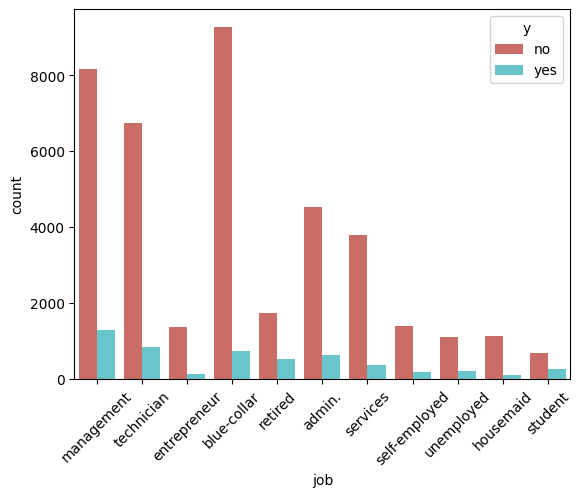

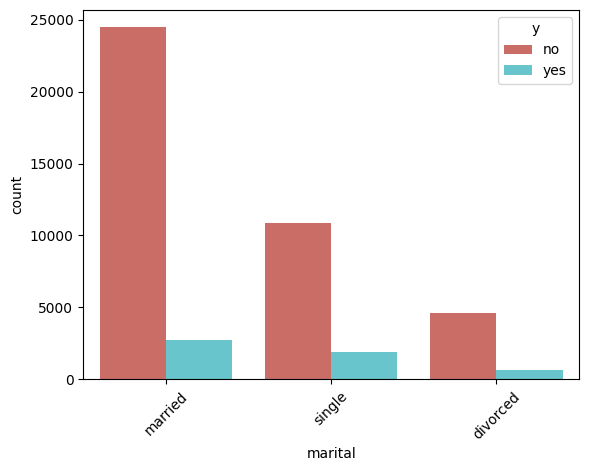

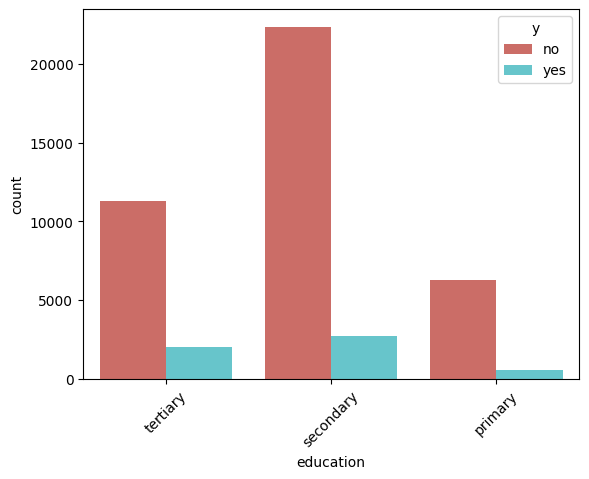

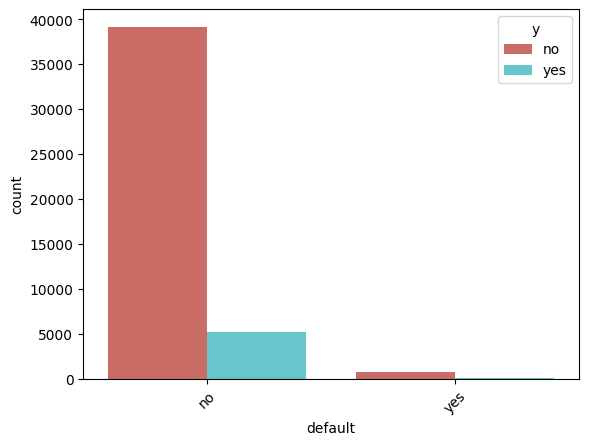

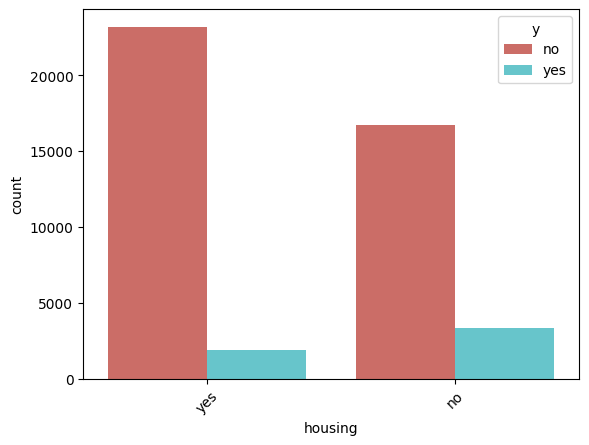

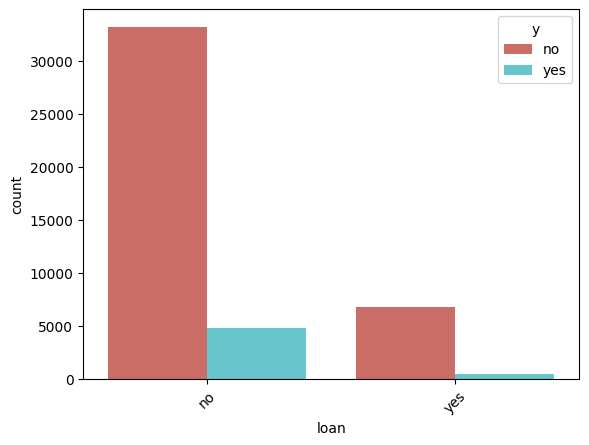

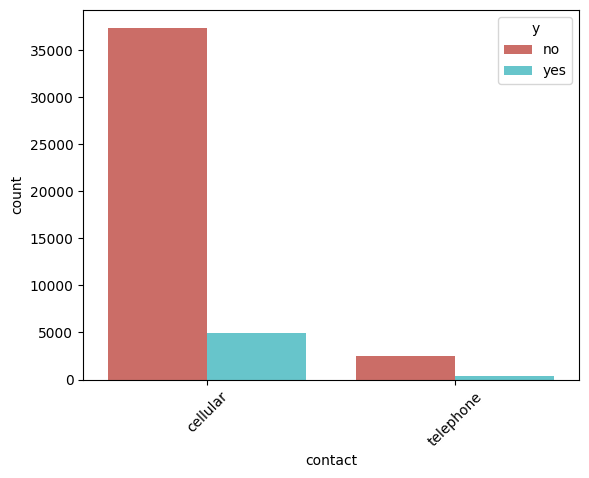

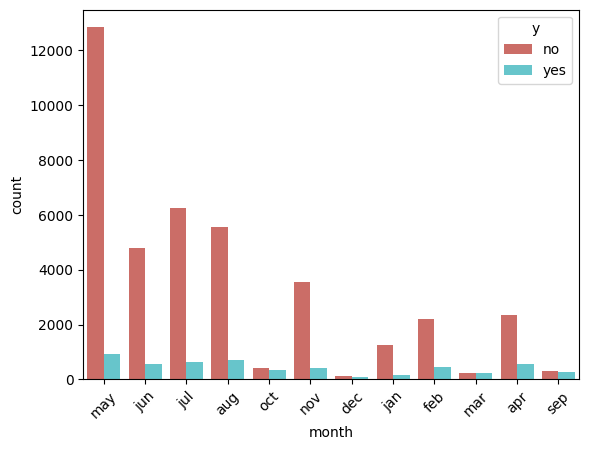

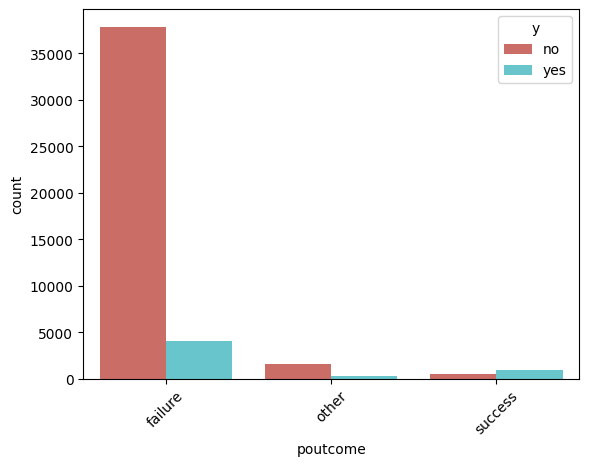

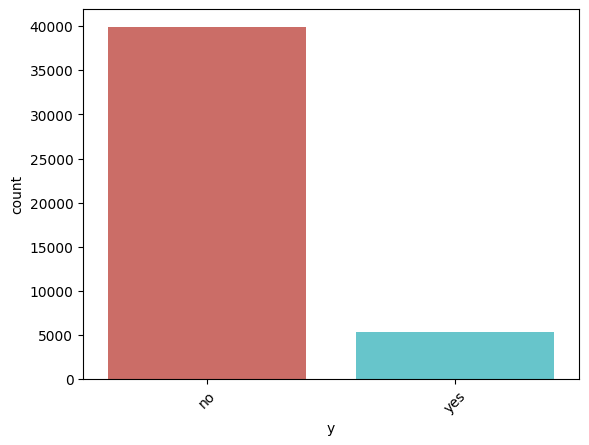

In [64]:
for col in categorical_cols:
  counts_atr(col)





---


*Escriba* su respuesta en esta celda...


---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

In [200]:
numerical_cols

['age', 'balance', 'day_of_week', 'previous', 'duration', 'campaign', 'pdays']

In [202]:
df.describe()

age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

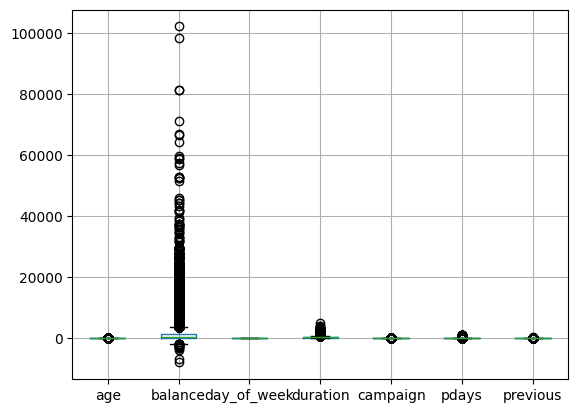

In [201]:
import matplotlib.pyplot as plt


columns_to_plot = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous']

boxplot = df.boxplot(column = columns_to_plot)
plt.show()


In [203]:
import numpy as np
df[['balance', 'duration', 'age', 'previous', 'campaign']] = df[['balance', 'duration', 'age', 'previous', 'campaign']].applymap(lambda x: x if x > 0 else 0)

C:\Users\Equipo\AppData\Local\Temp\ipykernel_31088\3684999697.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['balance', 'duration', 'age', 'previous', 'campaign']] = df[['balance', 'duration', 'age', 'previous', 'campaign']].applymap(lambda x: x if x > 0 else 0)


Todos estos valores no deberian tener negativos al ser balances, duracion de la llamada, edad, numero de contactos y cuantas veces se contacto previamente

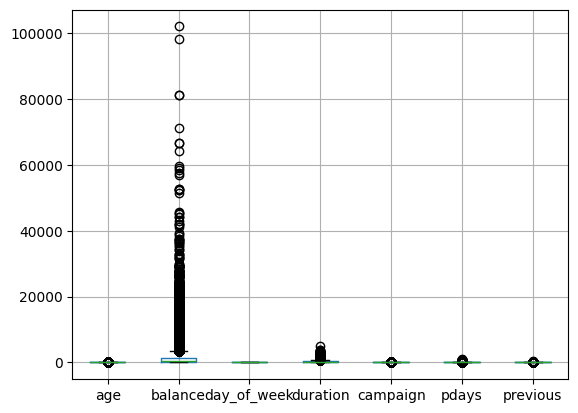

In [204]:
columns_to_plot = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous']

boxplot = df.boxplot(column = columns_to_plot)
plt.show()

Ahora se debe revisar que ocurriria con los datos al eliminar los outliers, revisando si son muchos en cada caso.

In [205]:
numero_de_filas = len(df)
print(f"Número de filas: {numero_de_filas}")

Número de filas: 45211


In [206]:
outlier_counts = {}

for col in columns_to_plot:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]
    

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Cantidad de Outliers'])
outlier_df = outlier_df.sort_values(by='Cantidad de Outliers', ascending=False)
print(outlier_df)

             Cantidad de Outliers
previous                     8257
pdays                        8257
balance                      4712
duration                     3235
campaign                     3064
age                           487
day_of_week                     0


Contabilizando que tenemos 45.211 datos en proporcion los outliers son de un:

In [208]:
# Total de observaciones
total_filas = df.shape[0]

# Columnas numéricas o específicas
numeric_cols = df.select_dtypes(include='number').columns

# Diccionario para guardar proporciones
outlier_ratios = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar outliers
    n_outliers = df[(df[col] > upper_bound)].shape[0]
    outlier_ratios[col] = round(n_outliers / total_filas, 4) 

outlier_ratio_df = pd.DataFrame.from_dict(outlier_ratios, orient='index', columns=['Proporción de Outliers'])
outlier_ratio_df = outlier_ratio_df.sort_values(by='Proporción de Outliers', ascending=False)

print(outlier_ratio_df)

             Proporción de Outliers
previous                     0.1826
pdays                        0.1826
balance                      0.1042
duration                     0.0716
campaign                     0.0678
age                          0.0108
day_of_week                  0.0000


Cabe destacar que el days of week es el dia en que se contacto asi que no aplicaria aqui, pero por lo general existen algunas columnas que tienen tasas altas de outliers como balance, pdays, duration y previous, es por esto que a estas 4 columnas se les aplicara una transformacion para que los outliers del limite superior sean igual al valor maximo del 75% de los datos.

In [209]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Límites para definir outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['balance'] = df['balance'].apply(lambda x: upper_bound if x > upper_bound else x)


In [210]:
Q1 = df['previous'].quantile(0.25)
Q3 = df['previous'].quantile(0.75)
IQR = Q3 - Q1

# Límites para definir outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



df['previous'] = df['previous'].apply(lambda x: upper_bound if x > upper_bound else x)


In [211]:
Q1 = df['pdays'].quantile(0.25)
Q3 = df['pdays'].quantile(0.75)
IQR = Q3 - Q1

# Límites para definir outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['pdays'] = df['pdays'].apply(lambda x: upper_bound if x > upper_bound else x)

In [212]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Límites para definir outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['duration'] = df['duration'].apply(lambda x: upper_bound if x > upper_bound else x)

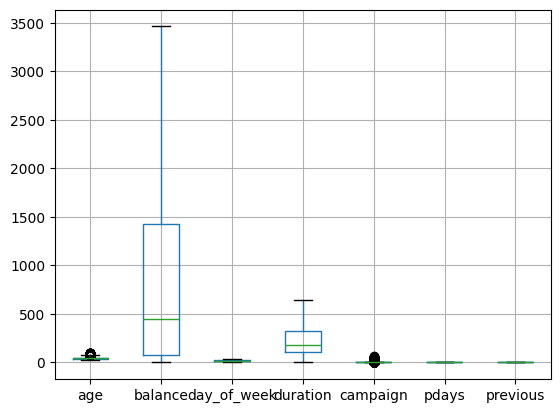

In [213]:
columns_to_plot = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous']

boxplot = df.boxplot(column = columns_to_plot)
plt.show()

In [214]:
numero_de_filas = len(df)
print(f"Número de filas: {numero_de_filas}")

Número de filas: 45211





---


*Escriba* su respuesta en esta celda...


---

## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41445 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41445 non-null  int64  
 1   job          41445 non-null  object 
 2   marital      41445 non-null  object 
 3   education    41445 non-null  object 
 4   default      41445 non-null  object 
 5   balance      41445 non-null  float64
 6   housing      41445 non-null  object 
 7   loan         41445 non-null  object 
 8   contact      41445 non-null  object 
 9   day_of_week  41445 non-null  int64  
 10  month        41445 non-null  object 
 11  duration     41445 non-null  float64
 12  campaign     41445 non-null  int64  
 13  pdays        41445 non-null  int64  
 14  previous     41445 non-null  int64  
 15  poutcome     41445 non-null  object 
 16  y            41445 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.7+ MB


In [215]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np


print("Columnas del dataset:")
print(df.columns)
    
ordinal_cols = ['month', 'education']
ordinal_mappings = {
    'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
              'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    'education': ['primary', 'secondary', 'tertiary']
}

categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_non_ordinal = list(set(categorical_cols) - set(ordinal_cols))

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

Columnas del dataset:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [217]:

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


ordinal_transformer = Pipeline(steps=[
    ("ordinal", OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols])),
    ("scaler", MinMaxScaler())
])

print("Columnas del dataset antes:")
print(df.columns)


Columnas del dataset antes:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [218]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_non_ordinal),
    ("ord", ordinal_transformer, ordinal_cols)
])

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])

# Ajustar y transformar
X_processed = pipeline.fit_transform(df)



In [219]:
def get_feature_names(preprocessor):
    output_features = []

    for name, transformer, columns in preprocessor.transformers_:
        if name == "remainder":
            continue

        if name == "num":
            output_features += columns  # numéricas conservan su nombre

        elif name == "cat":
            # Obtener nombres de variables dummies
            ohe = transformer.named_steps["onehot"]
            cat_feature_names = ohe.get_feature_names_out(columns)
            output_features += cat_feature_names.tolist()

        elif name == "ord":
            # Ordinal encoder normalizado, conservamos el nombre original
            output_features += columns

    return output_features


In [220]:
# Obtener nombres de columnas
column_names = get_feature_names(pipeline.named_steps["preprocessor"])

# Crear DataFrame con columnas
X_df = pd.DataFrame(X_processed, columns=column_names)

# Mostrar
print(X_df.head())



        age   balance  day_of_week  duration  campaign  pdays  previous  \
0  1.606965  1.030274    -1.298476  0.147445 -0.569351    0.0       0.0   
1  0.288529 -0.810383    -1.298476 -0.474910 -0.569351    0.0       0.0   
2 -0.747384 -0.833891    -1.298476 -0.899243 -0.569351    0.0       0.0   
3  0.571051  0.475639    -1.298476 -0.808718 -0.569351    0.0       0.0   
4 -0.747384 -0.834762    -1.298476 -0.208994 -0.569351    0.0       0.0   

   marital_divorced  marital_married  marital_single  ...  job_retired  \
0               0.0              1.0             0.0  ...          0.0   
1               0.0              0.0             1.0  ...          0.0   
2               0.0              1.0             0.0  ...          0.0   
3               0.0              1.0             0.0  ...          0.0   
4               0.0              0.0             1.0  ...          0.0   

   job_self-employed  job_services  job_student  job_technician  \
0                0.0           0.0   

In [221]:
del X_df['day_of_week']

In [222]:
print(X_df.head())

        age   balance  duration  campaign  pdays  previous  marital_divorced  \
0  1.606965  1.030274  0.147445 -0.569351    0.0       0.0               0.0   
1  0.288529 -0.810383 -0.474910 -0.569351    0.0       0.0               0.0   
2 -0.747384 -0.833891 -0.899243 -0.569351    0.0       0.0               0.0   
3  0.571051  0.475639 -0.808718 -0.569351    0.0       0.0               0.0   
4 -0.747384 -0.834762 -0.208994 -0.569351    0.0       0.0               0.0   

   marital_married  marital_single  loan_no  ...  job_retired  \
0              1.0             0.0      1.0  ...          0.0   
1              0.0             1.0      1.0  ...          0.0   
2              1.0             0.0      0.0  ...          0.0   
3              1.0             0.0      1.0  ...          0.0   
4              0.0             1.0      1.0  ...          0.0   

   job_self-employed  job_services  job_student  job_technician  \
0                0.0           0.0          0.0             0

## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


In [223]:
y = X_df[['y_yes', 'y_no']]
print(y)


       y_yes  y_no
0        0.0   1.0
1        0.0   1.0
2        0.0   1.0
3        0.0   1.0
4        0.0   1.0
...      ...   ...
45206    1.0   0.0
45207    1.0   0.0
45208    1.0   0.0
45209    0.0   1.0
45210    0.0   1.0

[45211 rows x 2 columns]


In [224]:
# Importamos las librerías que usaremos en esta pregunta
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [225]:

# Usamos solo la columna y_yes como variable objetivo binaria
Objetivo = X_df['y_yes']
Explicativas= X_df.drop(columns= ['y_yes', 'y_no'])

# División estratificada para mantener proporción
X_train, X_test, y_train, y_test = train_test_split(
    Explicativas, Objetivo     , test_size=0.25, random_state=123, stratify=Objetivo
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((33908, 33), (33908,), (11303, 33), (11303,))

### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [226]:
from sklearn.metrics import f1_score
tree_clf = DecisionTreeClassifier(random_state = 123, max_depth= None, splitter= 'random', class_weight='balanced')
tree_clf.fit(X_train, y_train)

tree_clf.score(X_train, y_train) #accuracy en el test set
# Predicciones sobre el conjunto de entrenamiento
y_train_pred = tree_clf.predict(X_train)

# 4. Calcular F1 Score
f1_train = f1_score(y_train, y_train_pred)
print(f1_train)

0.9997479838709677


In [164]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize= (14,8))
plot_tree(decision_tree=tree_clf, feature_names= Explicativas.columns, filled=True);
plt.show()

KeyboardInterrupt: 




---


Se puede decir que al no estar regularizado este toma una cantidad sumamente grande de profundidad lo que genera un sobreajuste claro, esto ya evidenciado en el valor del f1 para el entrenamiento que se acerca a 1, es decir, acierta en la clasificacion de los depositos a plazo en un numero cercano al 100% al usar datos de entrenamiento, lo que significa que al usarlo en otros datos es muy probable que pierda efectividad.


---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra correcta. ¿Considera que es un buen valor? Comente.

In [227]:
# Predicción en conjunto de prueba
y_test_pred = tree_clf.predict(X_test)

# Calcular F1 Score
f1_test = f1_score(y_test, y_test_pred)

print(f1_test)


0.4246782740348221





---


Un F1 Score de 0.4246 en el conjunto de prueba indica que el árbol no regularizado tiene dificultades para generalizar fuera de la muestra de entrenamiento. Esto es esperable, ya que al no tener restricciones, el modelo sobreajusta el entrenamiento y pierde capacidad predictiva en nuevos datos. Aunque el accuracy podría ser alto, este F1 Score sugiere que el modelo no está clasificando adecuadamente los clientes que harán un depósito, lo cual implica costos de marketing innecesarios o pérdida de oportunidades valiosas. Es necesario aplicar técnicas de regularización (como limitar la profundidad del árbol) o ajustar el modelo para mejorar la precisión y recall al mismo tiempo.


---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [228]:
tree_clf_reg = DecisionTreeClassifier(random_state = 123, max_depth= 16, splitter= 'random', class_weight='balanced')
tree_clf_reg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=16, random_state=123,
                       splitter='random')

In [229]:
y_train_pred_reg = tree_clf_reg.predict(X_train)

# Calcular F1 Score
f1_train_reg = f1_score(y_train, y_train_pred_reg)
print(f"F1 Score en entrenamiento (árbol profundidad 16): {f1_train_reg:.4f}")


F1 Score en entrenamiento (árbol profundidad 16): 0.6554


Se puede observar que con un F1 score de 0.6554 es mas grande la precision de este modelo respecto al modelo sin profundidad maxima, esto se da ya que el arbol no tiene un sobreajuste sobre los datos de entrenamiento, de esta forma se permite cierta flexibilidad mejorando la prediccion del modelo sobre los datos de entrenamiento y evitando el sobreajuste.

In [52]:
plt.figure(figsize= (14,8))
plot_tree(decision_tree=tree_clf_reg, feature_names= Explicativas.columns, filled=True);




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?


In [230]:
tree_clf_reg_real = DecisionTreeClassifier(random_state = 123, max_depth= 8, splitter= 'random', class_weight='balanced')
tree_clf_reg_real.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=123,
                       splitter='random')

In [231]:
y_train_pred_reg_real = tree_clf_reg.predict(X_train)

# Calcular F1 Score
f1_train_reg_real = f1_score(y_train, y_train_pred_reg_real)
print(f"F1 Score en entrenamiento (árbol profundidad 8): {f1_train_reg:.4f}")


F1 Score en entrenamiento (árbol profundidad 8): 0.6554


En este caso el reducir aun mas la profundidad no logro mejorar el poder de prediccion del modelo respecto a 16 de profundidad maxima respecto a los datos de entrenamiento.

In [232]:
plt.figure(figsize= (14,8))
plot_tree(decision_tree=tree_clf_reg_real, feature_names= Explicativas.columns, filled=True);

KeyboardInterrupt: 




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Gafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?

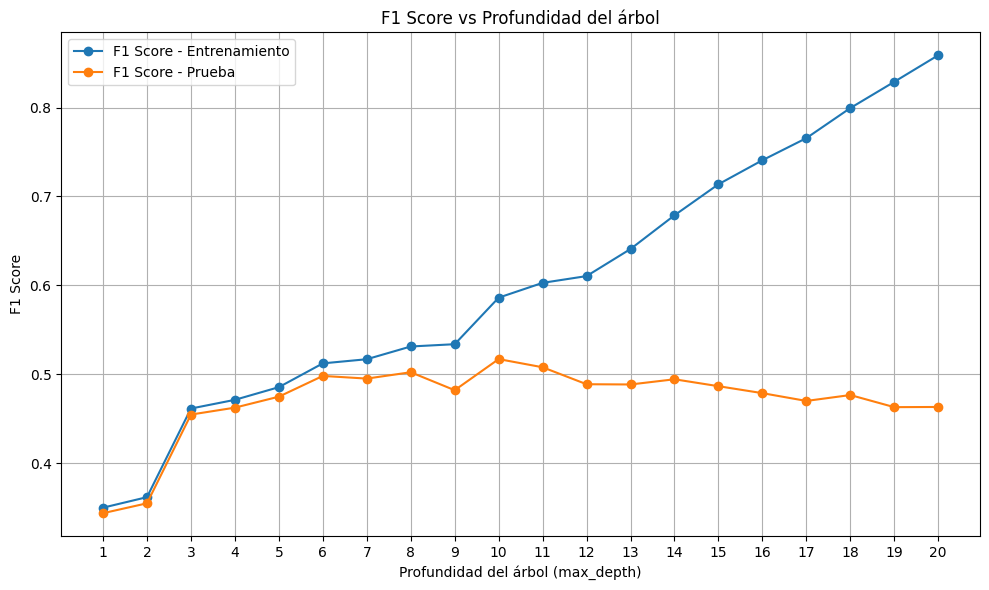

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Listas para guardar resultados
train_f1_scores = []
test_f1_scores = []
depths = range(1, 21)

# Entrenar árboles para max_depth de 1 a 20
for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, class_weight='balanced', random_state=123)
    tree.fit(X_train, y_train)

    # Predicciones
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    # F1 scores
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    train_f1_scores.append(f1_train)
    test_f1_scores.append(f1_test)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(depths, train_f1_scores, label='F1 Score - Entrenamiento', marker='o')
plt.plot(depths, test_f1_scores, label='F1 Score - Prueba', marker='o')
plt.xlabel('Profundidad del árbol (max_depth)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Profundidad del árbol')
plt.legend()
plt.grid(True)
plt.xticks(depths)
plt.tight_layout()
plt.show()






---

La profundidad optima se puede observar que tiende a estar entre 4 y 8 de profuncidad, debido a que el F1 Score para los datos de entrenamiento y prueba con el modelo comienzan a desviarse a partir de la profundidad 9 en adelante, de esta forma se podria entender que a partir de este punto se podria llegar a un overfitting de las variables produciendo la perdida de cierto poder predictivo del modelo, aunque igual se hace necesario comparar que en la profundidad 10 del arbol, el F1Score aumenta para la muestra de prueba respecto al predicho, lo que podria sugerir que a este nivel de profundidad el modelo predice de mejor forma. Todo lo anterior se debe evaluar al tener en cuenta que tal vez con esta base de datos justo en la profundidad 10 se toma una decision optima de prediccion, pero a su vez considerar que a mayor profundidad, mas probable se hace que caigamos en overfitting.

---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random orest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



In [174]:
# Buscamos los hiperparámetros que maximizan el accuracy
param_grid = [
    {"n_estimators":[100, 1000],  # number of trees in the forest
     'max_depth': [10, 50, 100],  # maximum depth of the tree
     'min_samples_leaf': [2, 4,]},  # minimum number of samples required to be at a leaf node
    ]  # Combinación de parámetros
rf = RandomForestClassifier(random_state = 123)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)  # "Entrenamos" el grid search
grid_search.best_params_

{'max_depth': 50, 'min_samples_leaf': 2, 'n_estimators': 1000}

In [233]:
rf = RandomForestClassifier(random_state = 123, max_depth=50, min_samples_leaf=2, n_estimators=1000)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=2, n_estimators=1000,
                       random_state=123)

In [234]:
y_final_rfc = rf.predict(X_test)

# Calcular F1 Score
f1_rfc = f1_score(y_test, y_final_rfc)
print(f"F1 Score en test (árbol profundidad 50): {f1_rfc:.4f}")

F1 Score en test (árbol profundidad 50): 0.4280


In [235]:
rf.score(X_test, y_test)

0.9009112624966823

### Pregunta 1.12

En esta pregunta deberá entrenar _XGBpost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


In [236]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 123)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [237]:
xgb.score(X_test, y_test) ##accuracy en el test set

0.898876404494382

In [179]:
param_grid = [{"n_estimators":[100, 1000] ,'max_depth': [5, 10, 50], 'learning_rate': [0.05, 0.1, 0.5], 'max_leaves':[2, 4, 10,]}] #combinación de parámetros
xgb = XGBClassifier(random_state = 12)

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring = 'accuracy', return_train_score=True)
grid_search.fit(X_train, y_train) #entrenamos el grid search
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'max_leaves': 10, 'n_estimators': 1000}

In [238]:
xgb = XGBClassifier(random_state = 123, n_estimators=1000, max_depth=5, learning_rate=0.05, max_leaves= 10)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=10, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [239]:
xgb.score(X_test, y_test) ##accuracy en el test set

0.898876404494382

In [240]:
xgb_prediction= xgb.predict(X_test)
f1_xgb=f1_score(y_test,xgb_prediction)
print(f1_xgb)

0.4739990796134376


### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

In [241]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [242]:
gnb.score(X_train, y_train)  # Classification accuracy

0.8250265424088711

In [243]:
gnb.score(X_test, y_test)  # Classification accuracy


0.8250906838892329

In [244]:
gaussian_prediction=gnb.predict(X_test)

In [245]:
f1_gaussian= f1_score(y_test, gaussian_prediction)
print(f1_gaussian)

0.3761438939728621




---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).




---


Para analizar correctamente los modelos se debe mostrar todos los f1 score de cada uno respecto a los datos de testeo, a su vez calculando el accuracy y el recall. De esta forma se podra ver cuales modelos clasifican de mejor forma cada caso y cuantos positivos clasifica correctamente.


---


In [247]:

f1_gaussian= f1_score(y_test, gaussian_prediction)
print(f1_gaussian)

f1_xgb=f1_score(y_test,xgb_prediction)
print(f1_xgb)

f1_rfc = f1_score(y_test, y_final_rfc)
print(f1_rfc)

0.3761438939728621
0.4739990796134376
0.4279877425944842


Estos son los valores del f1 para el modelo Gaussiano, con XGboost y el de random tree clasifier respectivamente para los datos de testeo de cada modelo.

In [249]:
print(gnb.score(X_test, y_test))
print(xgb.score(X_test, y_test))
print(rf.score(X_test, y_test))

0.8250906838892329
0.898876404494382
0.9009112624966823


Estos son los valores de accuracy para el modelo Gaussiano, con XGboost y el de random tree clasifier respectivamente para los datos de testeo de cada modelo.

Tomando en cuenta estos valores, uno puede observar que el modelo XGboost es el que tiene mayor f1 score, mientras que quien tiene mayor accuracy es el random tree clasiffier. En este caso, dado que la clase positiva (clientes que sí hacen un depósito) es minoritaria, el accuracy por sí solo no es una métrica confiable. El F1 Score nos permite evaluar el compromiso entre precisión y recall, siendo más representativo de la performance real. El modelo de XGBoost muestra el mejor F1 Score, indicando que es el que mejor maneja el balance entre detectar correctamente los depósitos y no cometer demasiados errores. Naive Bayes muestra limitaciones debido a sus supuestos estadísticos simplistas, mientras que el árbol de decisión logra buenos resultados, pero probablemente con cierto sobreajuste.

# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.csv")
df = df.drop(columns=["Series Code", "Country Code"])
df = df.melt(id_vars=["Country Name", "Series Name"], var_name="Year", value_name="Value")
df = df.pivot(index="Country Name", columns="Series Name", values="Value").reset_index()
df.head()

Series Name                 Country Name  \
0                            Afghanistan   
1            Africa Eastern and Southern   
2             Africa Western and Central   
3                                Albania   
4                                Algeria   

Series Name Agricultural raw materials exports (% of merchandise exports)  \
0                                                           ..              
1                                             1.93287526195653              
2                                             3.80482687815641              
3                                            0.406032063201426              
4                                                           ..              

Series Name Computer; communications and other services (% of commercial service exports)  \
0                                                           ..                              
1                                             35.9298385263195                              
2                                             23.7057568350145                              
3                                             24.4301090197124                              
4                                             59.1626427564765                              

Series Name Exports of goods and services (% of GDP)  \
0                                   16.7751362822863   
1                                   24.3483372544611   
2                                                 ..   
3                                   38.6650817896799   
4                                   23.6195363708424   

Series Name Food exports (% of merchandise exports)  \
0                                                ..   
1                                   14.285851632509   
2                                  12.9874441377748   
3                                  11.9640780632637   
4                                                ..   

Series Name Fuel exports (% of merchandise exports) GDP growth (annual %)  \
0                                                ..      2.71088679128353   
1                                  25.4254224001233      2.32013780158925   
2                                  61.3705691120184       3.3547328190002   
3                                  6.34538423879421      3.93662525742167   
4                                                ..      4.10000000000004   

Series Name High-technology exports (% of manufactured exports)  \
0                                                           ..    
1                                             5.80516538196113    
2                                                           ..    
3                                            0.682326849473647    
4                                                           ..    

Series Name ICT service exports (% of service exports; BoP)  \
0                                                        ..   
1                                          6.10657347896149   
2                                          5.69176863421842   
3                                          3.01397608748124   
4                                          2.21311390791552   

Series Name Insurance and financial services (% of service exports; BoP)  \
0                                                           ..             
1                                             6.08028700896879             
2                                             14.9934752391386             
3                                            0.662505307988438             
4                                             10.2830758414755             

Series Name International tourism; receipts (% of total exports)  \
0                                                           ..     
1                                                           ..     
2                                                           ..     
3                                                           ..     
4  

### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




In [6]:
grupos_eliminar = ["Africa Eastern and Southern", "Africa Western and Central", "Arab World", "Caribbean small states", "Central Europe and the Baltics", "Early-demographic dividend", "East Asia & Pacific", "East Asia & Pacific (IDA & IBRD countries)", "East Asia & Pacific (excluding high income)", "Euro area", "Europe & Central Asia", "Europe & Central Asia (IDA & IBRD countries)", "Europe & Central Asia (excluding high income)", "European Union", "Fragile and conflict affected situations", "Heavily indebted poor countries (HIPC)", "High income", "IBRD only", "IDA & IBRD total", "IDA blend", "IDA only", "IDA total", "Late-demographic dividend", "Latin America & Caribbean", "Latin America & Caribbean (excluding high income)", "Latin America & the Caribbean (IDA & IBRD countries)", "Least developed countries: UN classification", "Low & middle income", "Low income", "Lower middle income", "Middle East & North Africa", "Middle East & North Africa (IDA & IBRD countries)",    "Middle East & North Africa (excluding high income)", "Middle income", "North America", "Not classified", "OECD members", "Other small states", "Pacific island small states", "Post-demographic dividend", "Pre-demographic dividend", "Small states", "South Asia", "South Asia (IDA & IBRD)", "Sub-Saharan Africa", "Sub-Saharan Africa (IDA & IBRD countries)", "Sub-Saharan Africa (excluding high income)", "Upper middle income", "World"]
df = df[~df["Country Name"].isin(grupos_eliminar)].copy() # Elimina la fila si corresponde a una del grupo a eliminar
df.head()

Series Name    Country Name  \
0               Afghanistan   
3                   Albania   
4                   Algeria   
5            American Samoa   
6                   Andorra   

Series Name Agricultural raw materials exports (% of merchandise exports)  \
0                                                           ..              
3                                            0.406032063201426              
4                                                           ..              
5                                                           ..              
6                                            0.415383101399855              

Series Name Computer; communications and other services (% of commercial service exports)  \
0                                                           ..                              
3                                             24.4301090197124                              
4                                             59.1626427564765                              
5                                                           ..                              
6                                             12.8811837923156                              

Series Name Exports of goods and services (% of GDP)  \
0                                   16.7751362822863   
3                                   38.6650817896799   
4                                   23.6195363708424   
5                                                 ..   
6                                                 ..   

Series Name Food exports (% of merchandise exports)  \
0                                                ..   
3                                  11.9640780632637   
4                                                ..   
5                                                ..   
6                                   1.0898638304214   

Series Name Fuel exports (% of merchandise exports) GDP growth (annual %)  \
0                                                ..      2.71088679128353   
3                                  6.34538423879421      3.93662525742167   
4                                                ..      4.10000000000004   
5                                                ..                    ..   
6                                0.0101475994472374      2.58355480961319   

Series Name High-technology exports (% of manufactured exports)  \
0                                                           ..    
3                                            0.682326849473647    
4                                                           ..    
5                                                           ..    
6                                             21.4346319155008    

Series Name ICT service exports (% of service exports; BoP)  \
0                                                        ..   
3                                          3.01397608748124   
4                                          2.21311390791552   
5                                                        ..   
6                                          4.34892555438222   

Series Name Insurance and financial services (% of service exports; BoP)  \
0                                                           ..             
3                                            0.662505307988438             
4                                             10.2830758414755             
5                                                           ..             
6                                             3.72824437871563             

Series Name International tourism; receipts (% of total exports)  \
0                                                           ..     
3                                                           ..     
4                                                           ..     
5                                                           ..     
6                                                           ..     

Series Name 

### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


In [8]:
for col in df.columns:
    if col != "Country Name":
        df[col] = pd.to_numeric(df[col], errors="coerce") # Para transformar variables a numéricas y ".." a NaN
df.describe()

Series Name  Agricultural raw materials exports (% of merchandise exports)  \
count                                               149.000000               
mean                                                  2.726255               
std                                                   7.416283               
min                                                   0.000000               
25%                                                   0.343928               
50%                                                   0.794963               
75%                                                   2.120083               
max                                                  63.703068               

Series Name  Computer; communications and other services (% of commercial service exports)  \
count                                               161.000000                               
mean                                                 35.005284                               
std                                                  23.550764                               
min                                                   0.935706                               
25%                                                  13.309551                               
50%                                                  32.273353                               
75%                                                  53.862266                               
max                                                  95.860793                               

Series Name  Exports of goods and services (% of GDP)  \
count                                      158.000000   
mean                                        45.398868   
std                                         33.331007   
min                                          1.108109   
25%                                         23.637110   
50%                                         38.790357   
75%                                         56.494967   
max                                        212.530618   

Series Name  Food exports (% of merchandise exports)  \
count                                     149.000000   
mean                                       24.136526   
std                                        23.862474   
min                                         0.079874   
25%                                         8.338115   
50%                                        15.056512   
75%                                        32.790842   
max                                        98.210416   

Series Name  Fuel exports (% of merchandise exports)  GDP growth (annual %)  \
count                                     145.000000             195.000000   
mean                                       14.275881               3.241160   
std                                        23.215387               6.641153   
min                                         0.000000             -20.111576   
25%                                         0.498740               1.168088   
50%                                         4.097826               2.960181   
75%                                        15.770449               4.987486   
max                                        95.516439              75.061377   

Series Name  High-technology exports (% of manufactured exports)  \
count                                               147.000000     
mean                                                 11.352849     
std                                                  13.507894     
min                                                   0.000000     
25%                                                   2.226174     
50%                                                   6.030929     
75%                                                  16.841983     
max                                                  72.315489     

Series Name  ICT service exports (% of service exports; BoP)  \
count                                     

### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

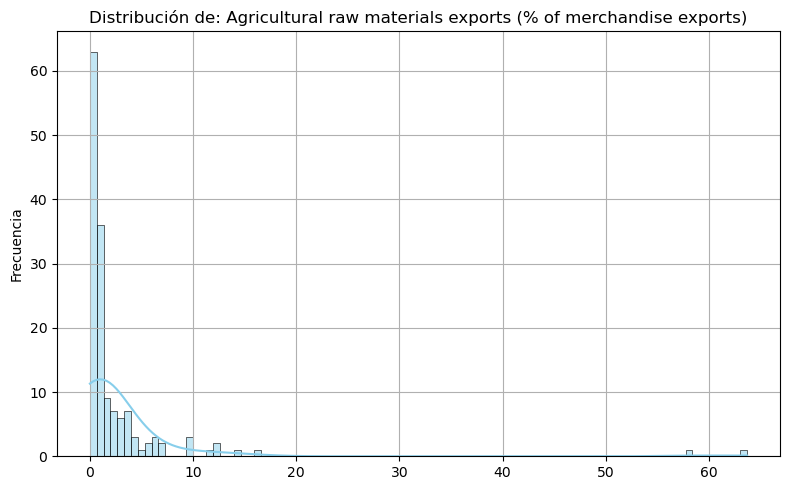

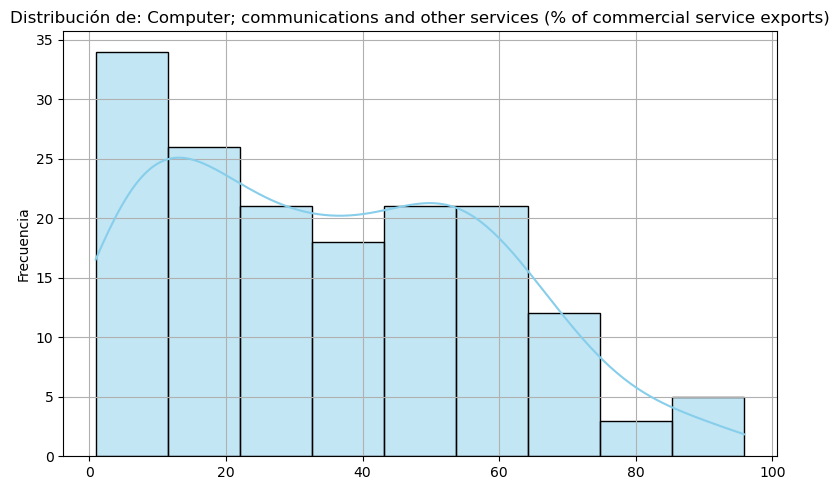

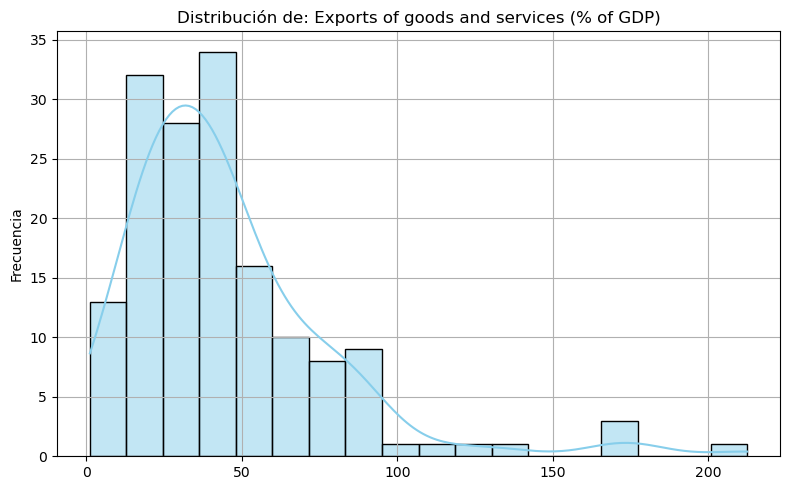

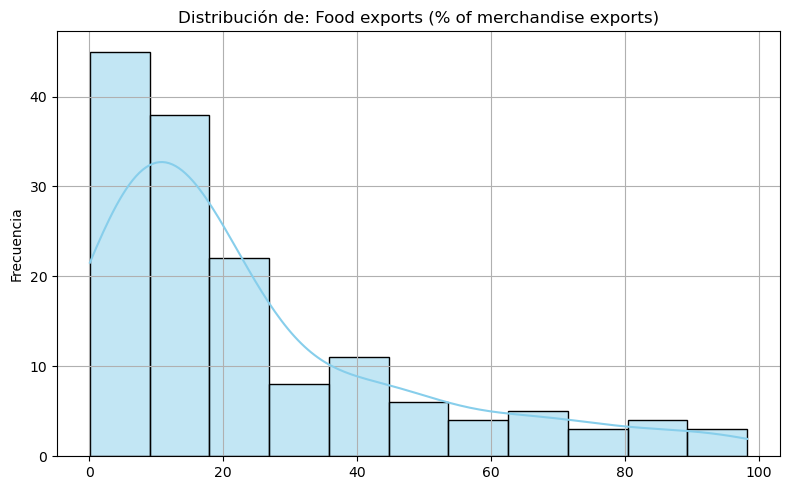

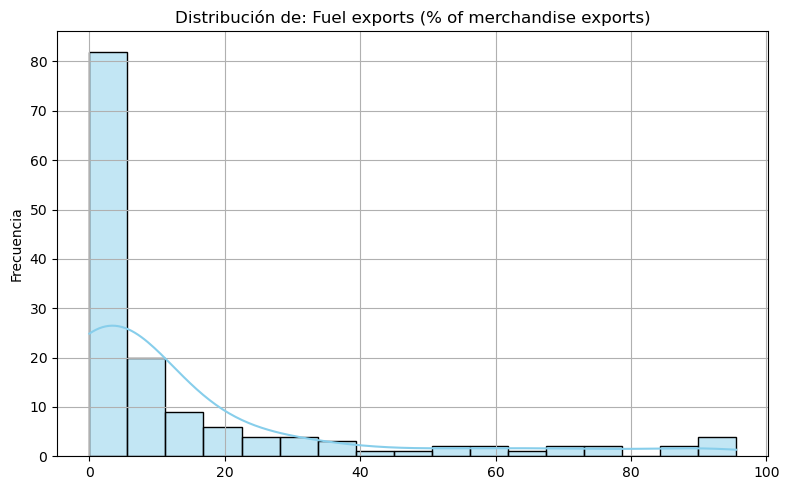

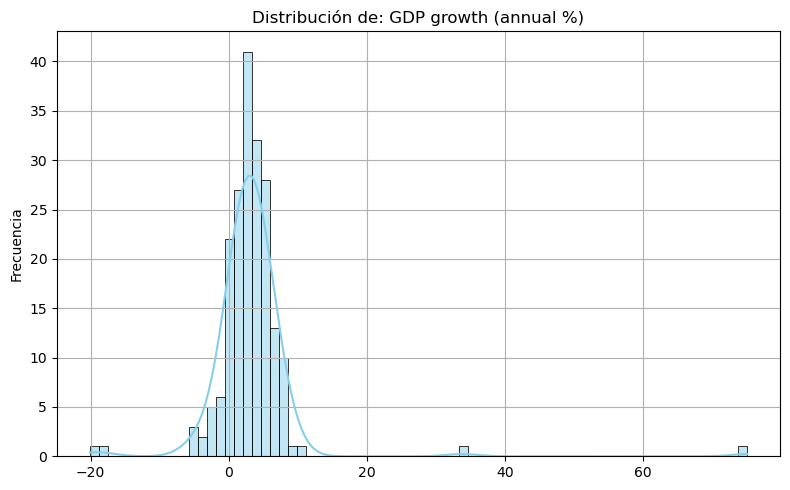

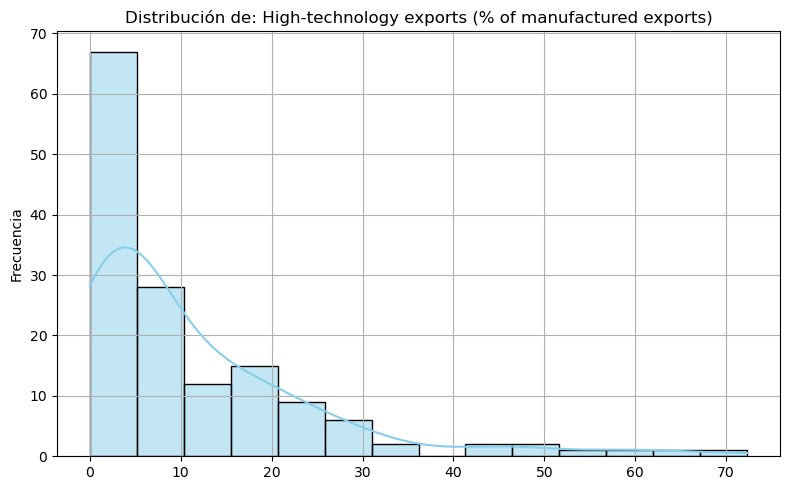

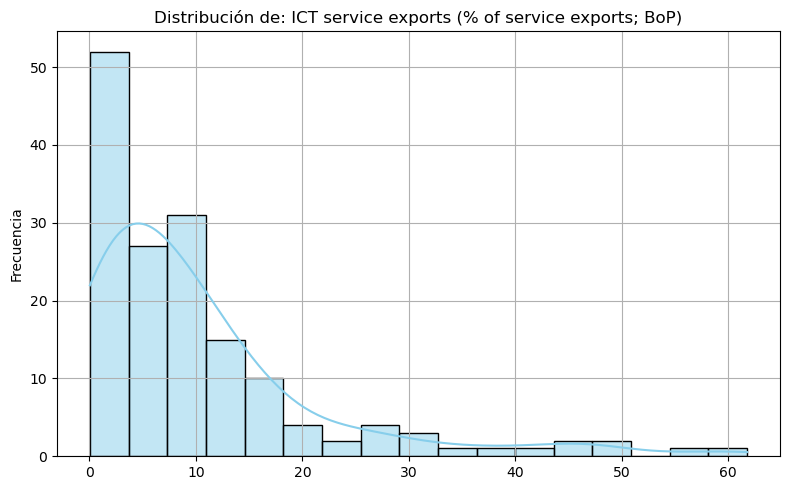

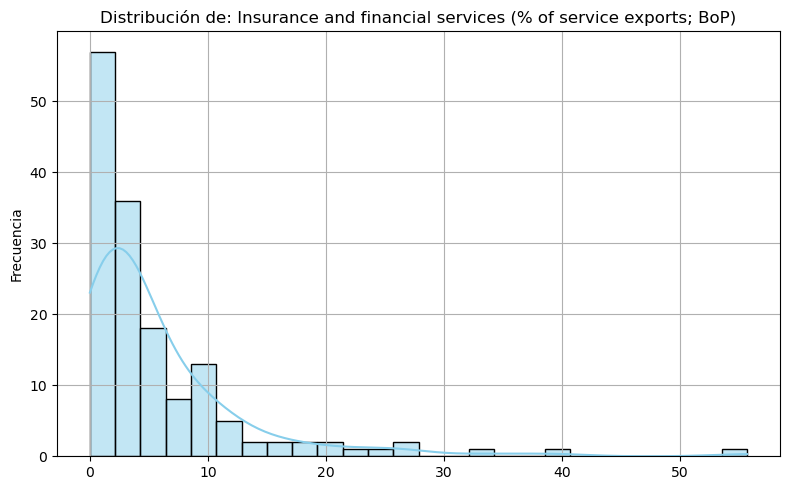

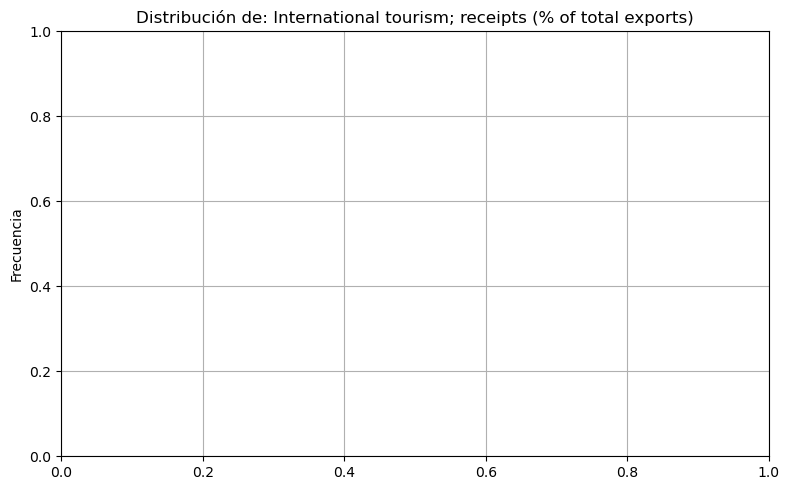

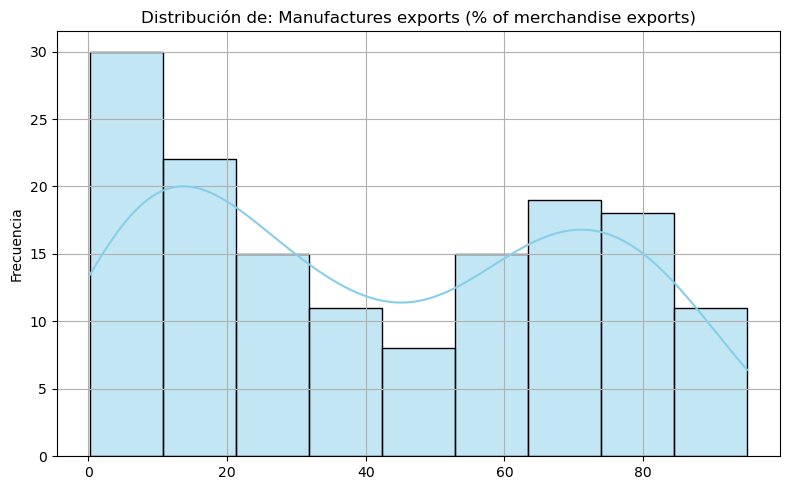

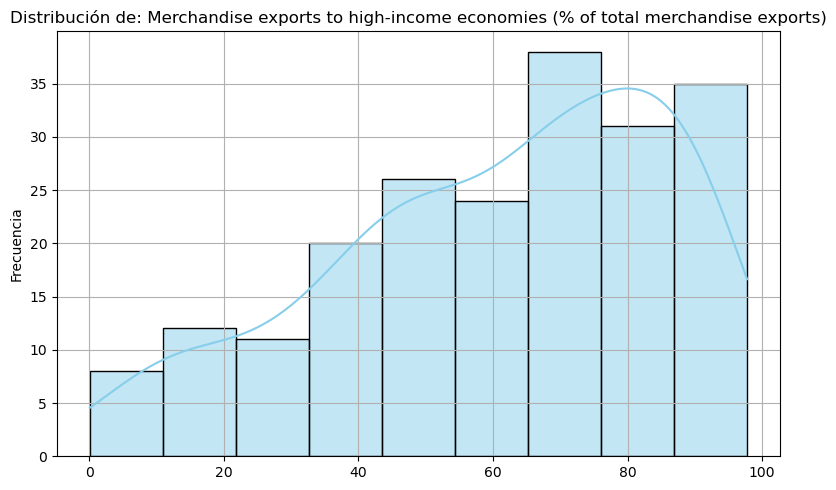

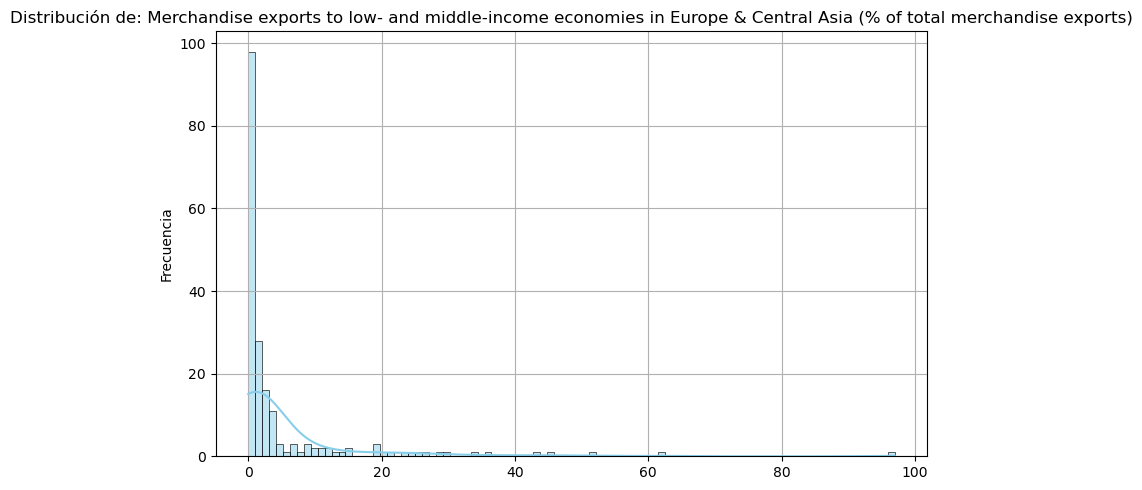

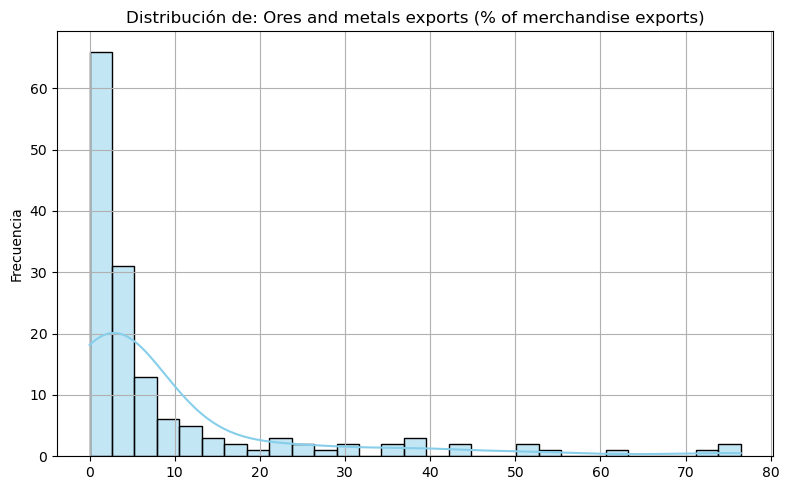

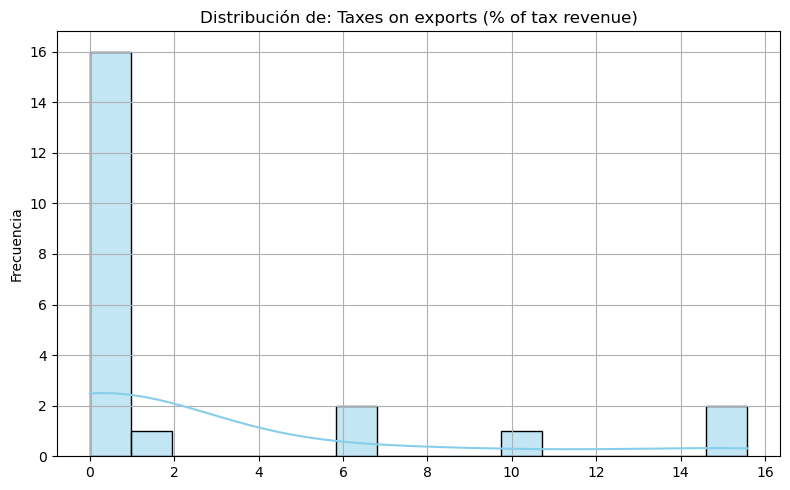

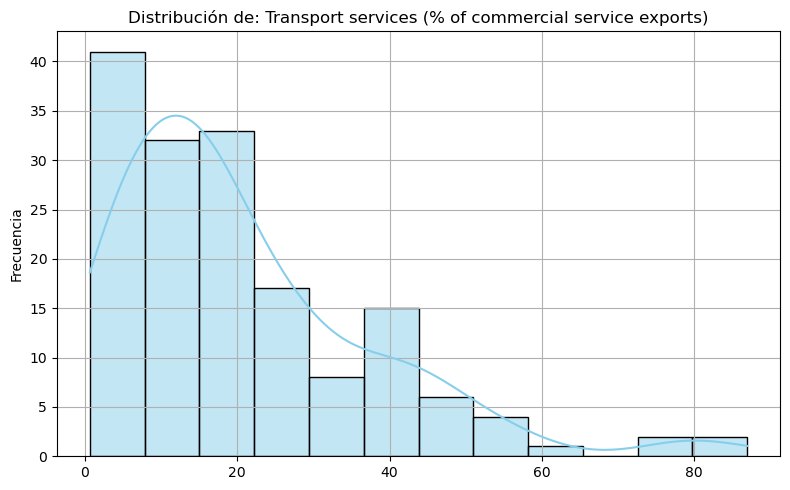

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def grafico(col):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    plt.title(f"Distribución de: {col}")
    plt.xlabel("")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for col in df.columns:
    if col != "Country Name":
        df[col] = pd.to_numeric(df[col], errors="coerce")
        grafico(col)




---

1. **Agricultural raw materials exports (% of merchandise exports)**
   La distribución está fuertemente sesgada a la derecha (asimetría positiva), con la mayoría de los países concentrados en valores muy bajos (0–5%). Esto sugiere que pocos países dependen en gran medida de la exportación de materias primas agrícolas, siendo una fuente marginal de exportaciones para la mayoría.

2. **Computer, communications and other services (% of commercial service exports)**
   La distribución es bimodal y relativamente dispersa, mostrando que los países se agrupan tanto en niveles bajos como medios-altos. Indica una heterogeneidad en la especialización en servicios tecnológicos (algunos países exportan principalmente estos servicios, mientras que otros apenas lo hacen).

3. **Exports of goods and services (% of GDP)**
   La distribución tiene una asimetría positiva, con un gran número de países en torno al 30–50% del PIB, pero con valores que alcanzan hasta más del 200%. Esto refleja que algunas economías (especialmente pequeñas o abiertas) dependen fuertemente del comercio exterior.

4. **Food exports (% of merchandise exports)**
   La distribución es también asimétrica a la derecha, con una concentración en valores bajos (0–20%) pero con una cola larga. Muestra que la mayoría de los países no dependen excesivamente de exportaciones de alimentos, aunque hay algunos casos donde sí representan una porción significativa.

5. **Fuel exports (% of merchandise exports)**
   Esta variable presenta una fuerte asimetría positiva. La mayoría de los países tiene una baja proporción de exportaciones de combustibles, pero unos pocos países (probablemente exportadores de petróleo) tienen porcentajes muy altos, cercanos al 100%.

6. **GDP growth (annual %)**
   La distribución se asemeja a una normal centrada en torno a valores positivos bajos o cercanos al cero, con colas más pesadas. Esto indica que la mayoría de los países crece a tasas moderadas, aunque hay eventos atípicos con recesiones profundas o crecimientos excepcionales.

7. **High-technology exports (% of manufactured exports)**
   La distribución es altamente sesgada a la derecha. Muchos países tienen una baja proporción de exportaciones tecnológicas, pero una minoría alcanza niveles altos. Esto sugiere una concentración de la capacidad tecnológica exportadora en pocos países.

8. **Taxes on exports (% of tax revenue)**
   La distribución está extremadamente concentrada en cero, lo que indica que la mayoría de los países no utilizan impuestos a las exportaciones como fuente significativa de ingresos. Algunos pocos países sí lo hacen, aunque no en niveles muy altos.

9. **Transport services (% of commercial service exports)**
   Asimétrica a la derecha, con la mayoría de los países entre 5% y 30%. Esto sugiere que el transporte representa una fracción moderada del total de exportaciones de servicios en la mayoría de los países.

10. **Manufactures exports (% of merchandise exports)**
    La distribución es bimodal y bastante dispersa. Hay grupos de países que exportan pocos productos manufacturados (menos del 20%) y otros que tienen una participación elevada (más del 70%), lo que refleja diferencias estructurales entre economías industriales y primario-exportadoras.

11. **Merchandise exports to high-income economies (% of total merchandise exports)**
   La distribución está sesgada a la izquierda, con una mayor concentración de países en valores altos (60–100%). Esto refleja que la mayoría de los países exportan principalmente a economías de altos ingresos, lo cual es coherente con la demanda agregada y el poder adquisitivo de esos mercados.

12. **Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)**
   La distribución está fuertemente sesgada a la derecha, con una mayoría de países que apenas comercia con estas economías. Solo unos pocos tienen una proporción significativa de exportaciones hacia esta región. Esto sugiere que Europa y Asia Central de ingresos bajos y medios no son socios comerciales relevantes para la mayoría de los países.

13. **Ores and metals exports (% of merchandise exports)**
   Distribución asimétrica a la derecha. La mayoría de los países tiene exportaciones de minerales y metales por debajo del 10%, aunque hay un grupo menor con una participación significativa (hasta un 70%). Esto refleja la especialización de ciertos países en minería.

14. **ICT service exports (% of service exports; BoP)**
   La distribución muestra una fuerte asimetría positiva. Muchos países tienen una baja participación de servicios TIC en sus exportaciones totales de servicios, con algunos pocos países muy especializados. Sugiere que el desarrollo del sector TIC aún está concentrado en ciertos países.

15. **International tourism; receipts (% of total exports)**
   La gráfica aparece vacía, lo cual indica que no hay datos disponibles. En este caso, no es posible hacer un análisis de la distribución. Revisando el dataset se encuentra que todos los datos son missings.

16. **Insurance and financial services (% of service exports; BoP)**
   Distribución altamente sesgada a la derecha, con valores concentrados bajo el 10%. Esto sugiere que, en la mayoría de los países, los servicios financieros y de seguros no son una fuente principal de exportación dentro de los servicios, aunque unos pocos países tienen sectores financieros exportadores más relevantes.

---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


Cantidad de variables missing antes del ajuste: 

Series Name
International tourism; receipts (% of total exports)                                                                 217
Taxes on exports (% of tax revenue)                                                                                  195
Fuel exports (% of merchandise exports)                                                                               72
High-technology exports (% of manufactured exports)                                                                   70
Manufactures exports (% of merchandise exports)                                                                       68
Food exports (% of merchandise exports)                                                                               68
Ores and metals exports (% of merchandise exports)                                                                    68
Agricultural raw materials exports (% of merchandise exports)                              

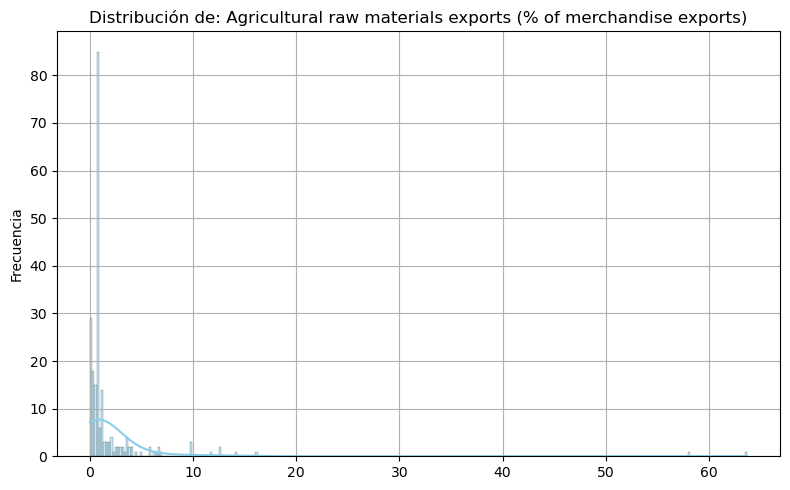

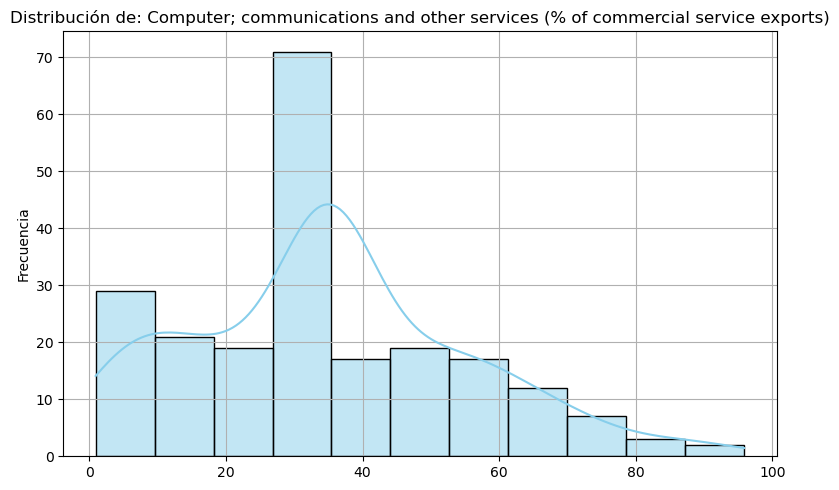

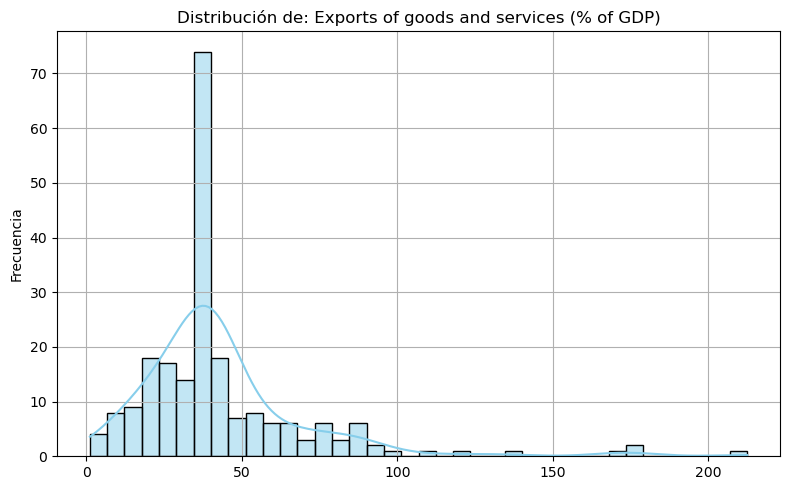

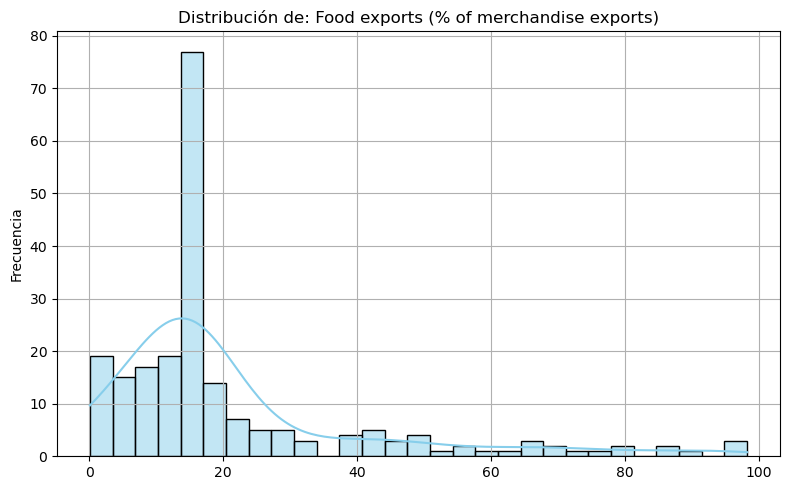

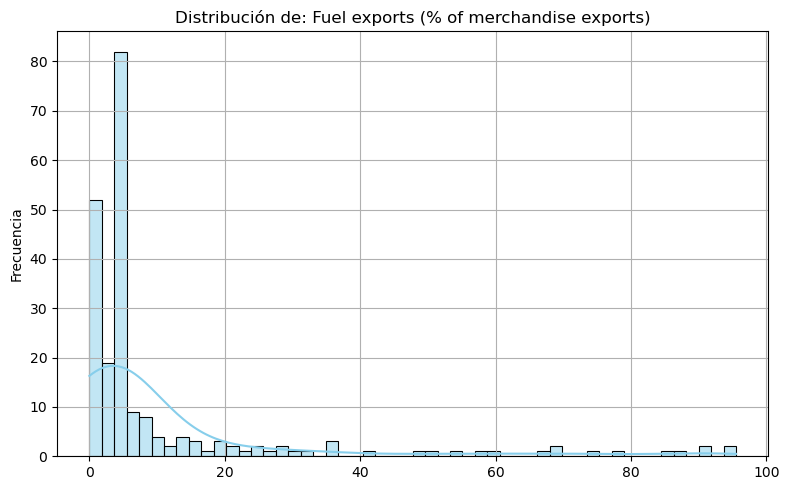

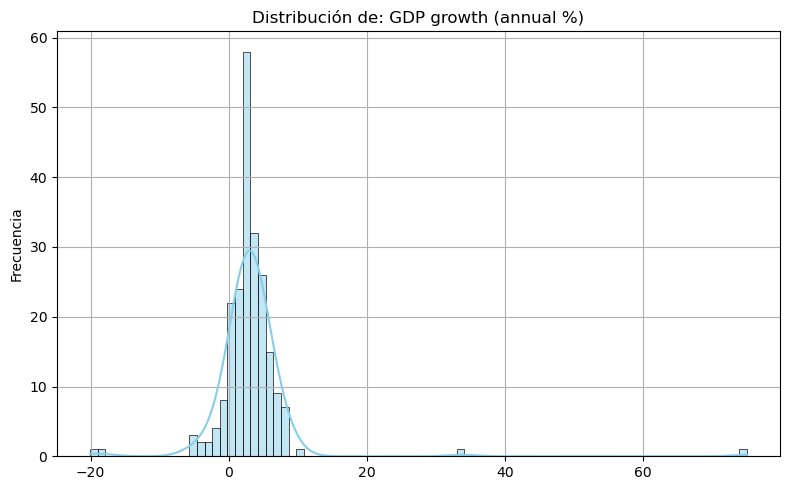

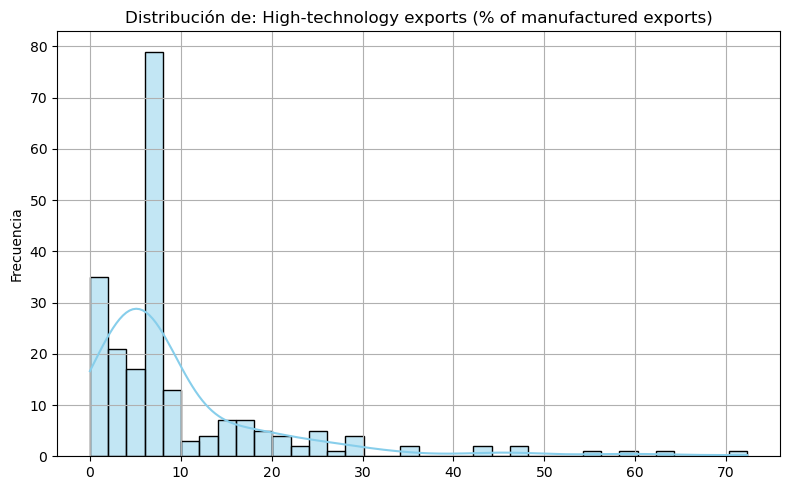

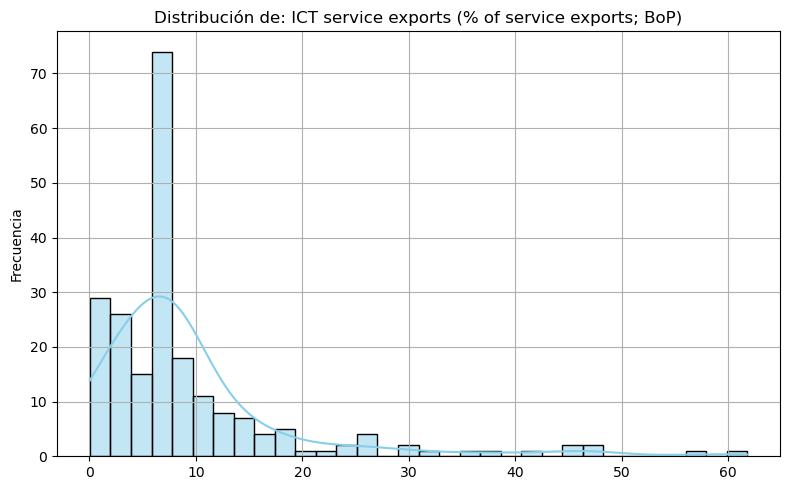

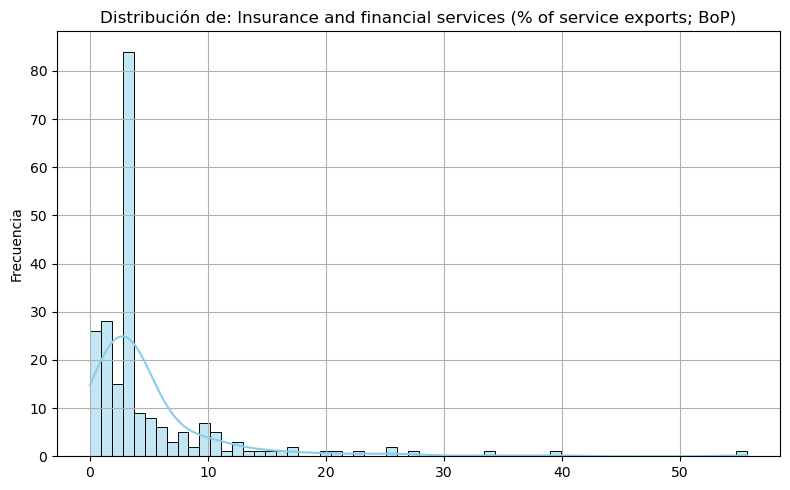

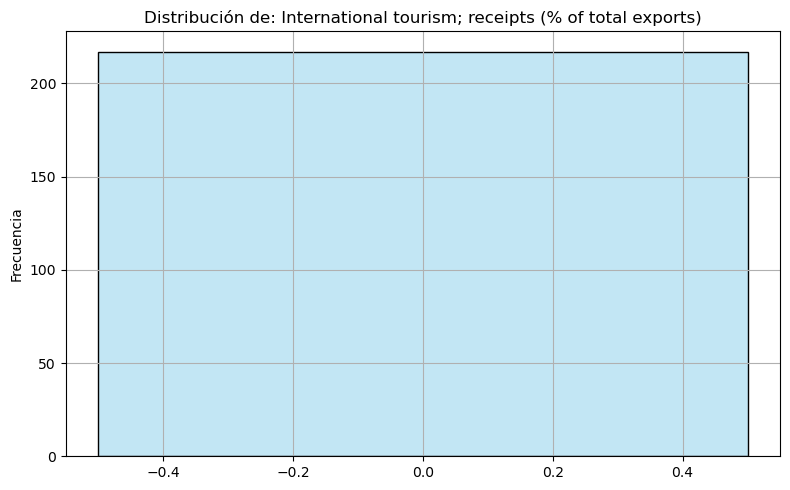

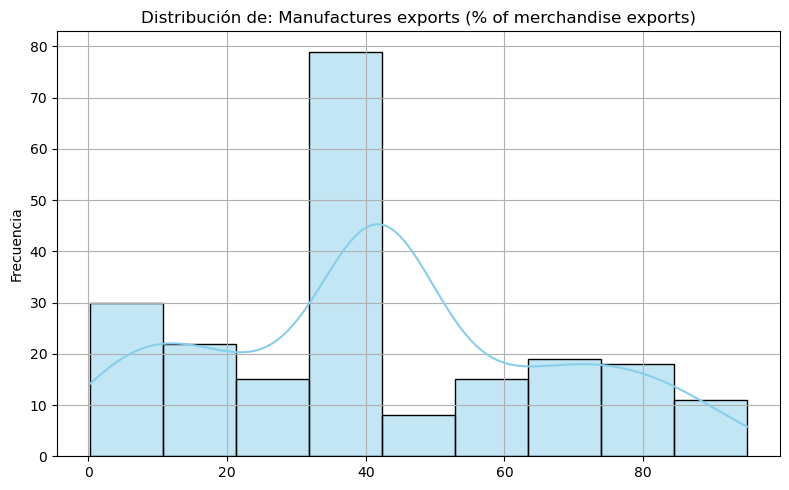

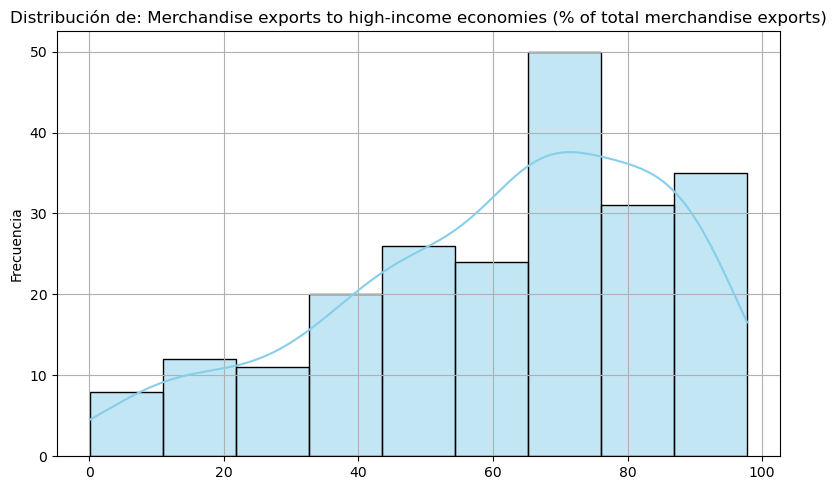

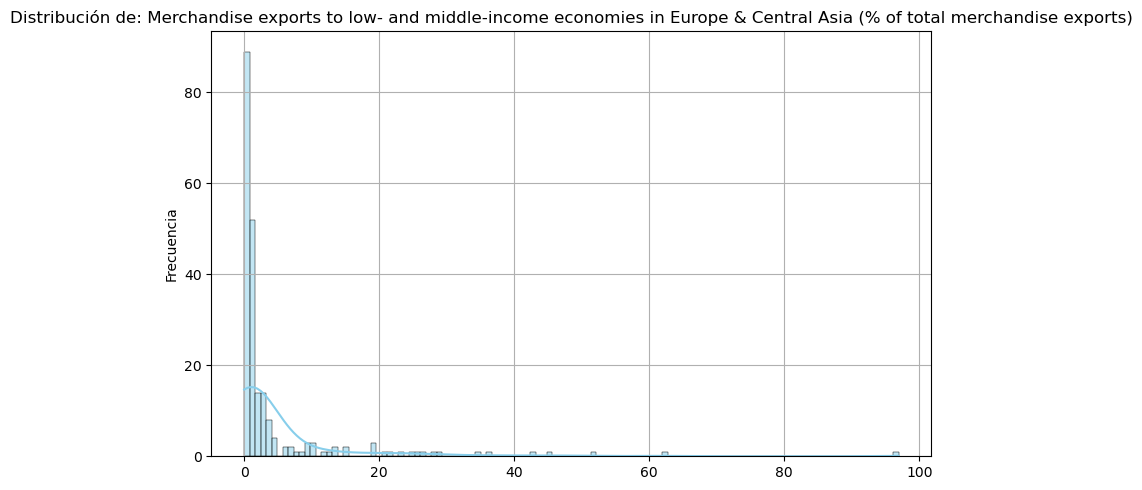

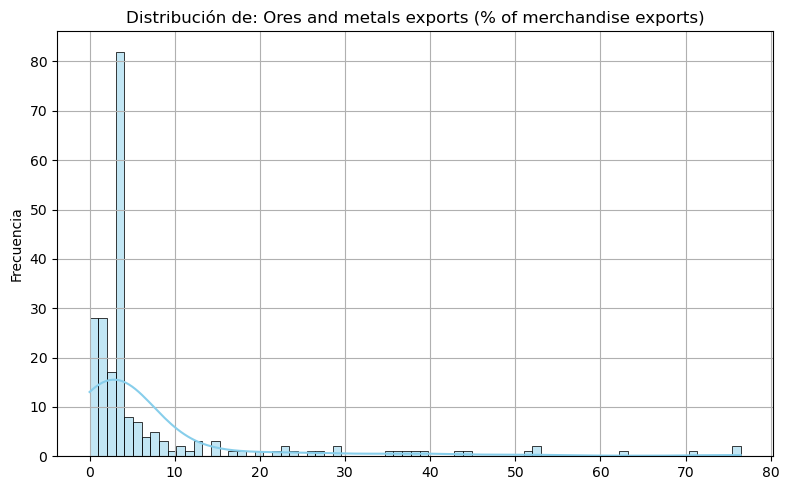

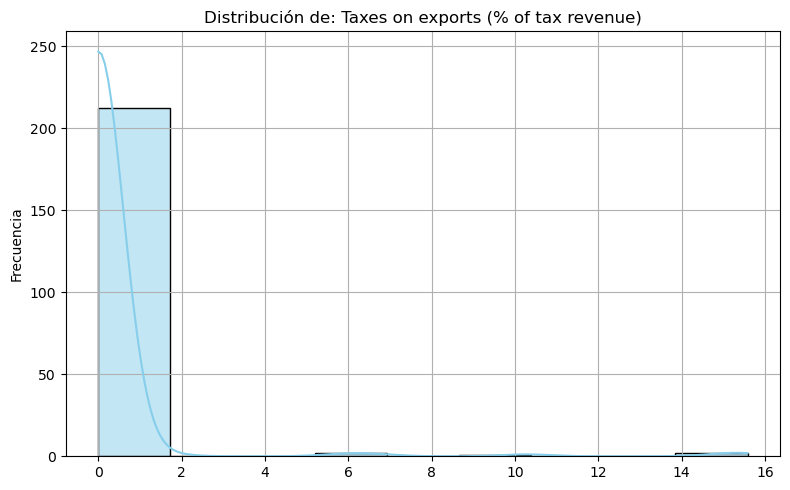

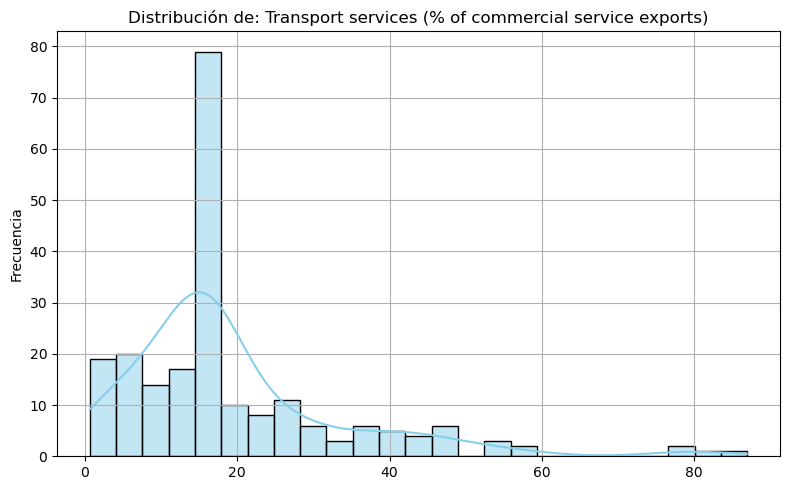

In [12]:
print("Cantidad de variables missing antes del ajuste: \n")
print(df.isnull().sum().sort_values(ascending=False))

max_missings = 150 
for col in df.columns:
    if col != "Country Name":
        missings = df[col].isnull().sum()
        if missings > max_missings:
            df[col] = df[col].fillna(0)
        else:
            skewness = df[col].skew(skipna=True)
            if -0.55 <= skewness <= 0.55:
                df[col] = df[col].fillna(df[col].mean())
            else:
                df[col] = df[col].fillna(df[col].median())

print("\n")
print("Cantidad de variables missing después del ajuste: \n")
print(df.isnull().sum().sort_values(ascending=False))

for col in df.columns:
    if col != "Country Name":
        df[col] = pd.to_numeric(df[col], errors="coerce")
        grafico(col)




---

Para el manejo de valores faltantes en el dataset, se adoptó una estrategia cuidadosamente balanceada que prioriza la conservación del máximo número de observaciones, evitando la eliminación masiva de datos que podría sesgar los resultados y reducir la representatividad del análisis.

En primer lugar, se estableció un umbral absoluto de 150 observaciones faltantes para tratar a las columnas "International tourism" y "Taxes on exports", las variables con un número de valores perdidos superior a este límite fueron imputadas con cero como valor default. Esta decisión permite mantener las filas correspondientes en el análisis sin introducir valores arbitrarios que distorsionen la interpretación y sin perder tantas observaciones, permitiendo así un posterior análisis menos sesgado que si se reemplazara el missing por la media o mediana.

Para el resto de columnas con menor cantidad de valores faltantes, se utilizó una medida de asimetría (coeficiente de skewness) para guiar la elección entre imputar con la media o la mediana. Cuando la distribución de los datos es aproximadamente simétrica (asimetría cercana a cero), la media resulta adecuada para preservar la tendencia central. En contraste, si la distribución presenta un sesgo significativo o presencia de valores extremos, la mediana se prefirió por su robustez frente a estos valores atípicos, evitando sesgos en la imputación.

---


## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.

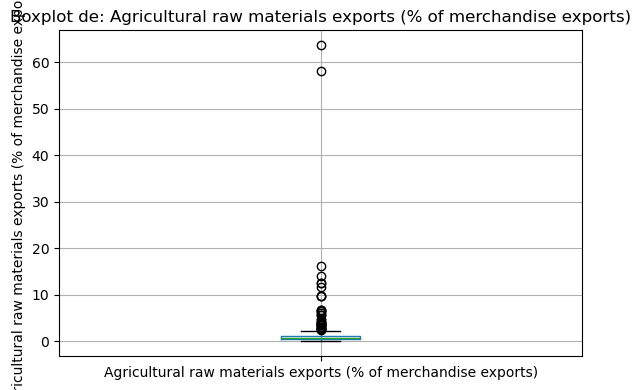

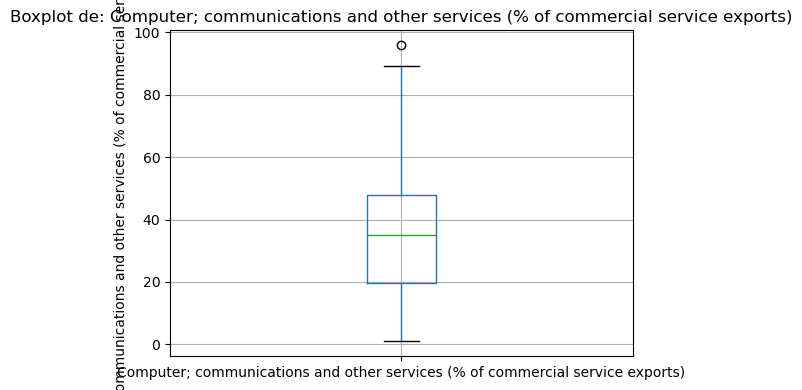

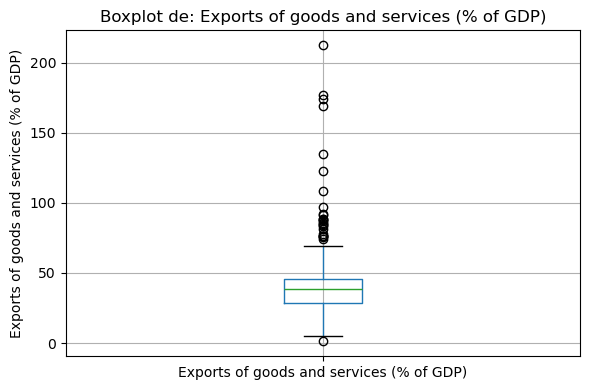

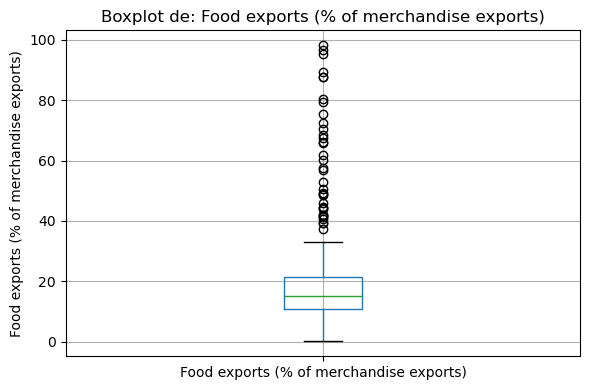

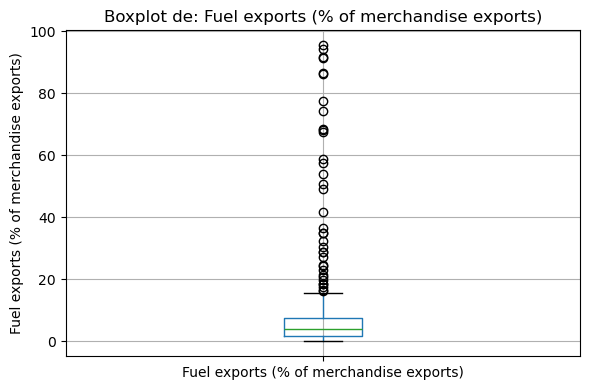

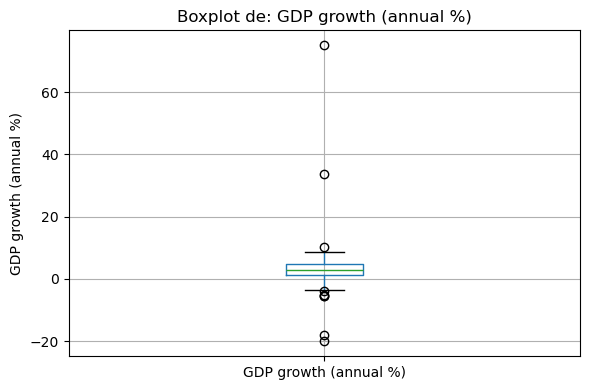

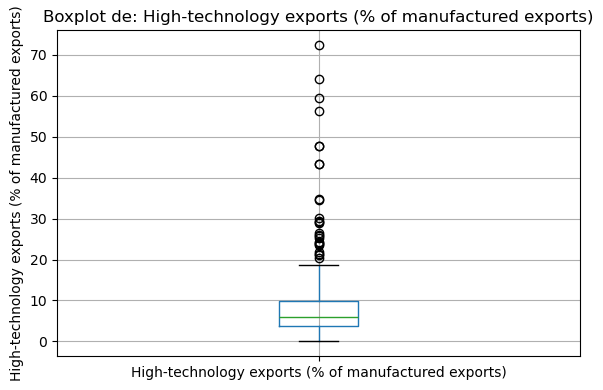

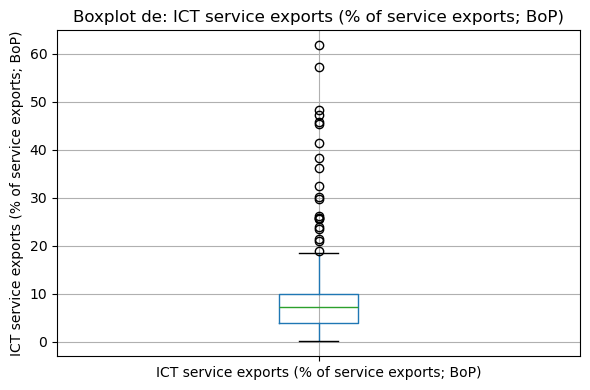

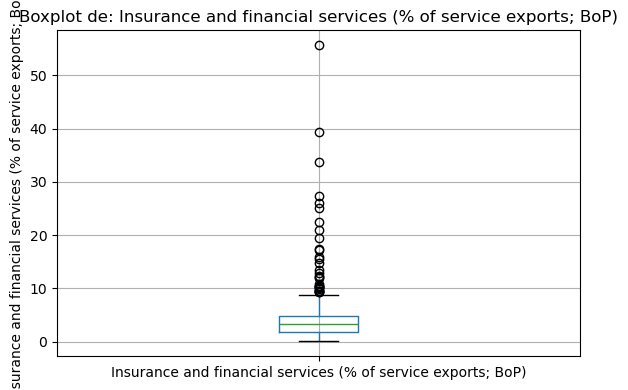

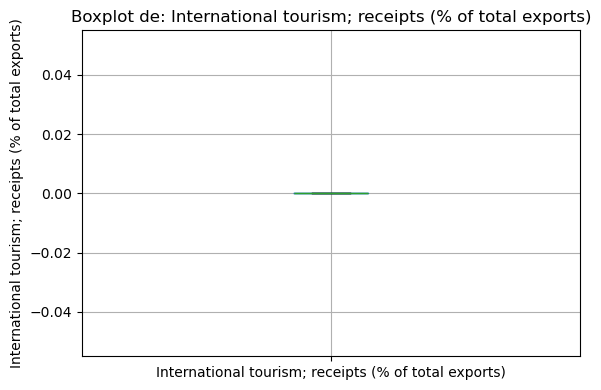

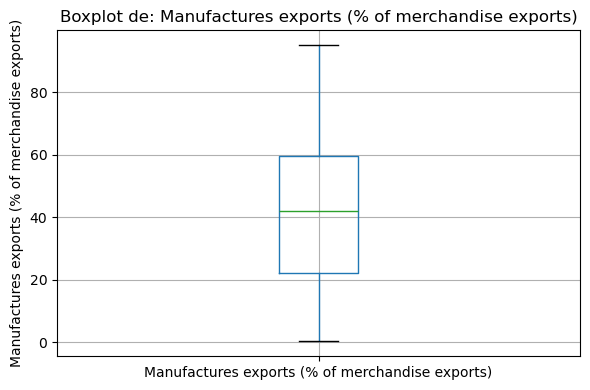

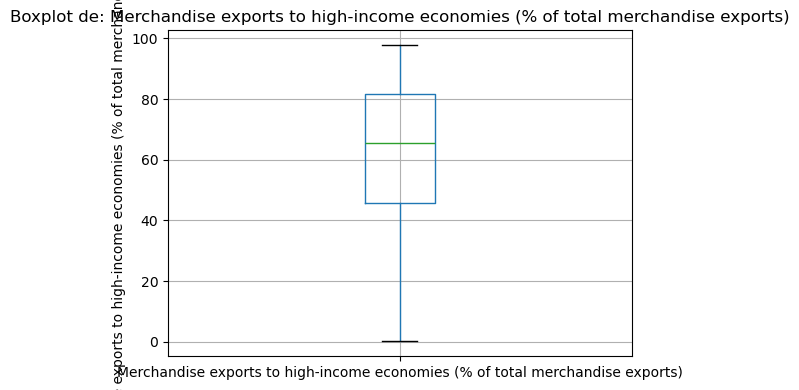

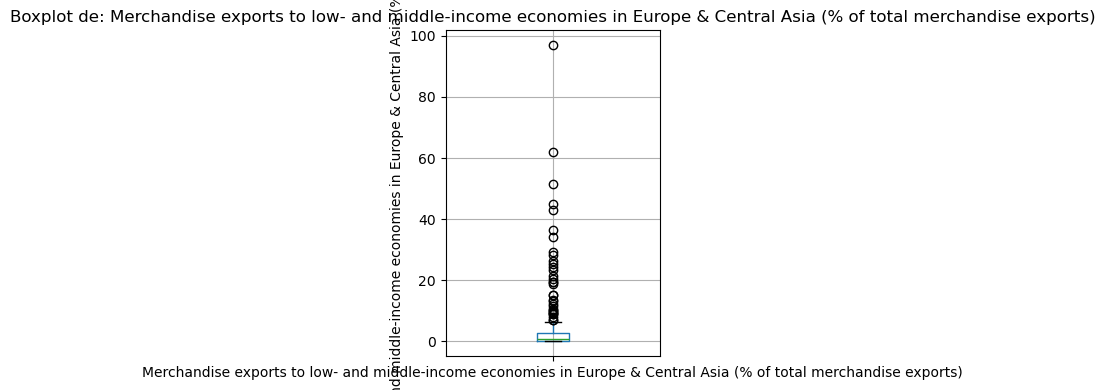

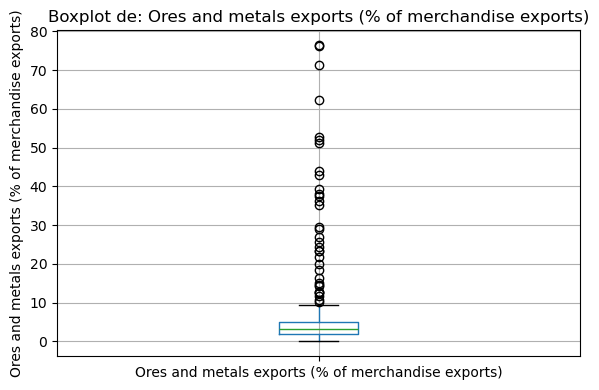

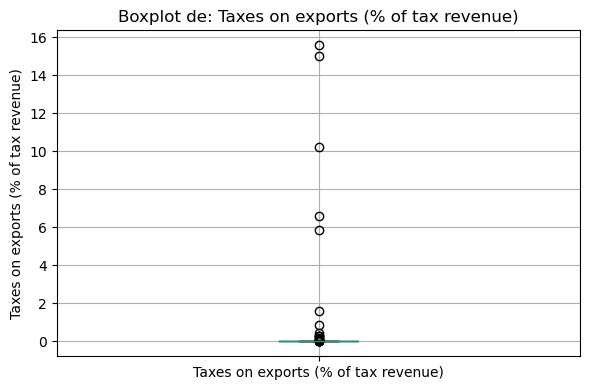

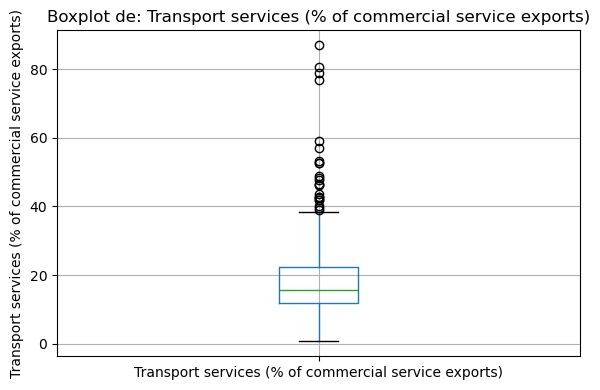

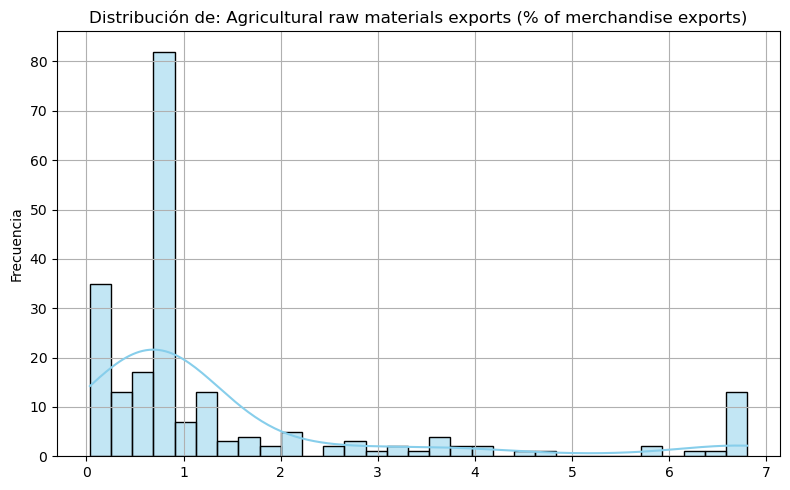

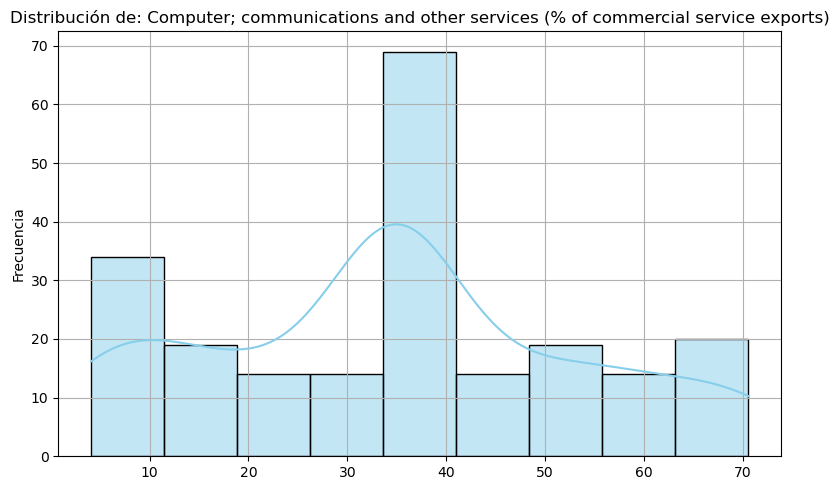

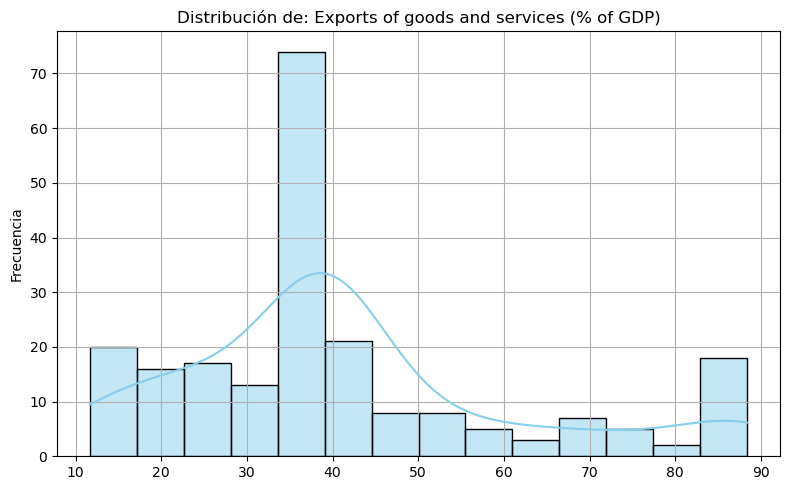

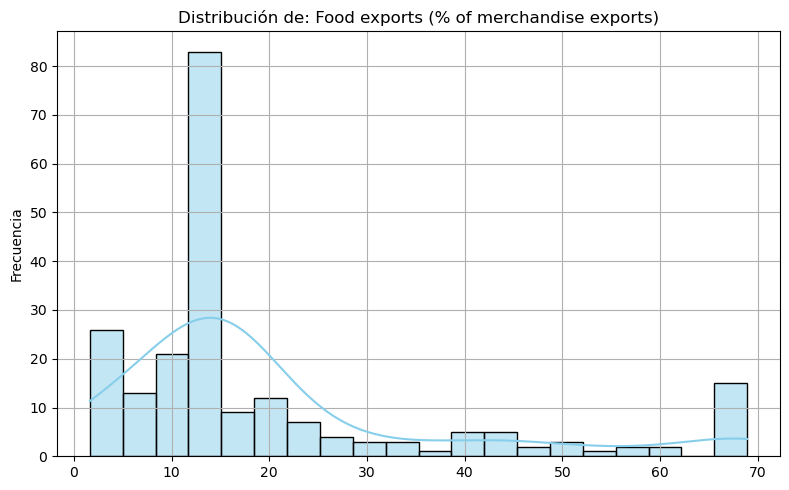

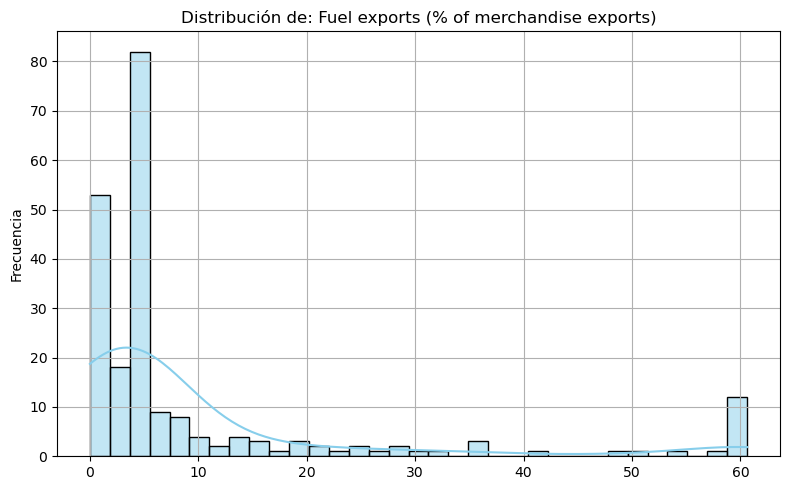

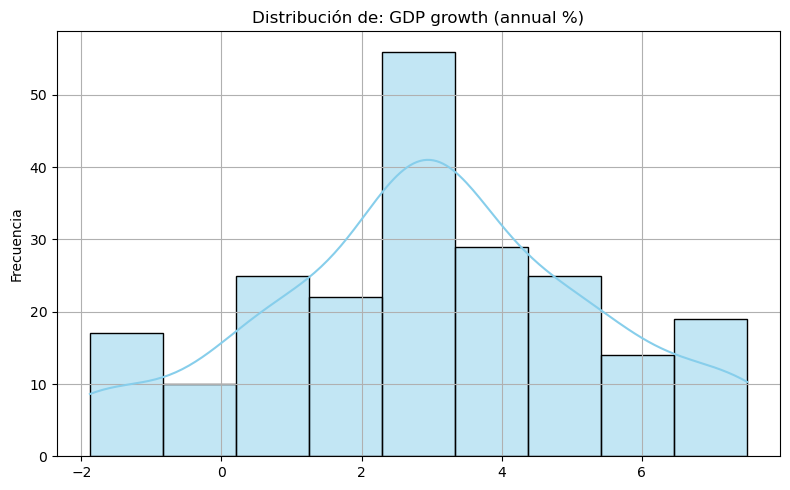

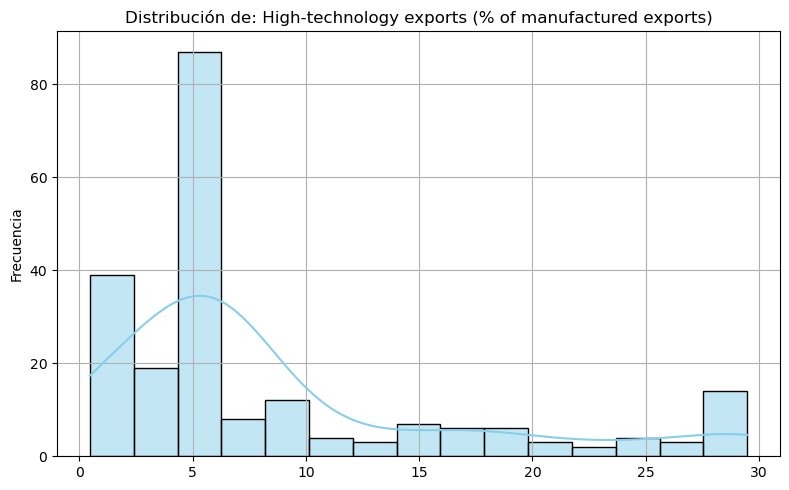

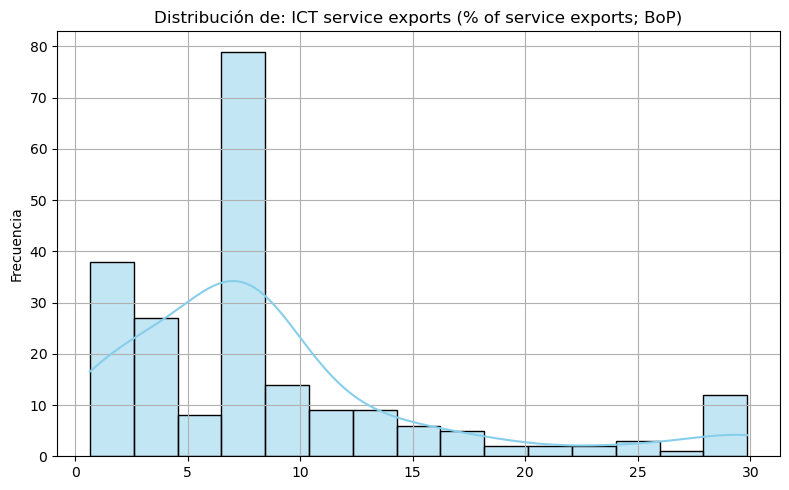

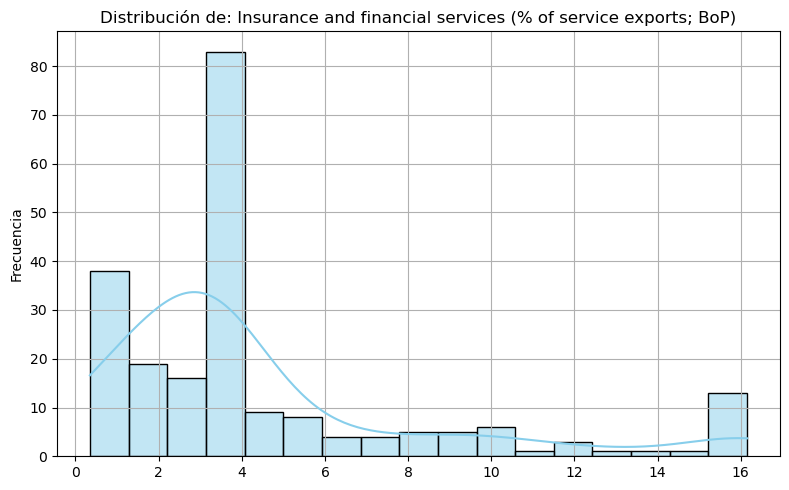

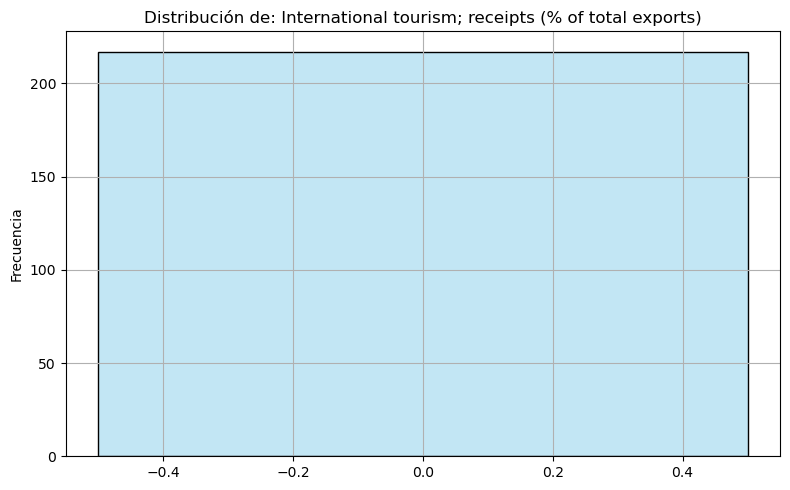

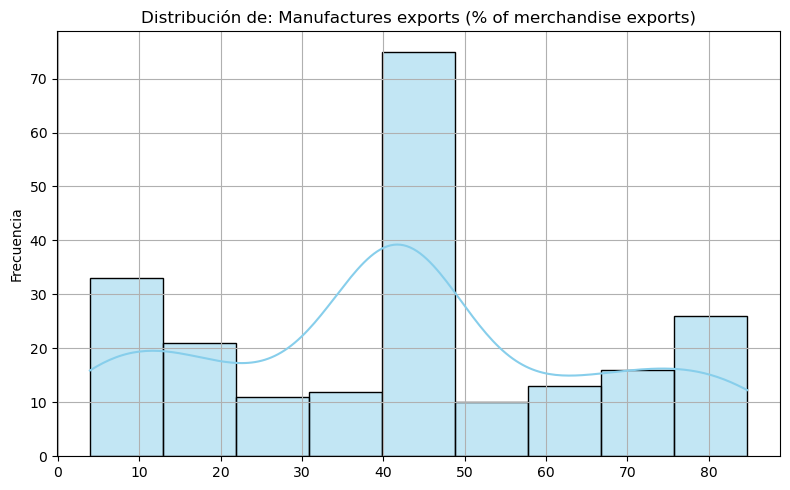

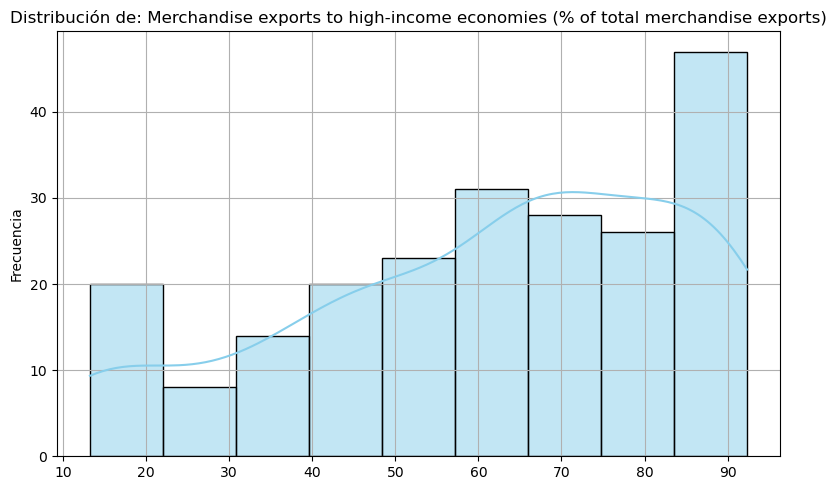

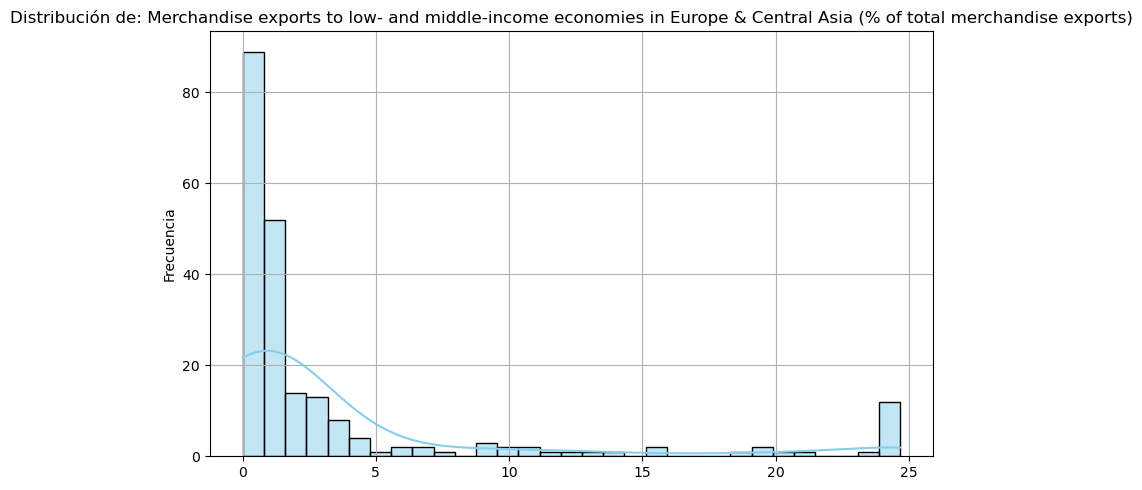

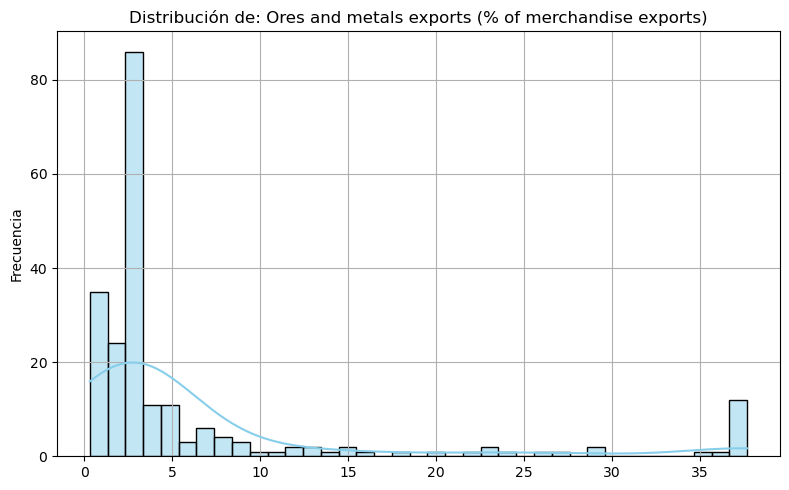

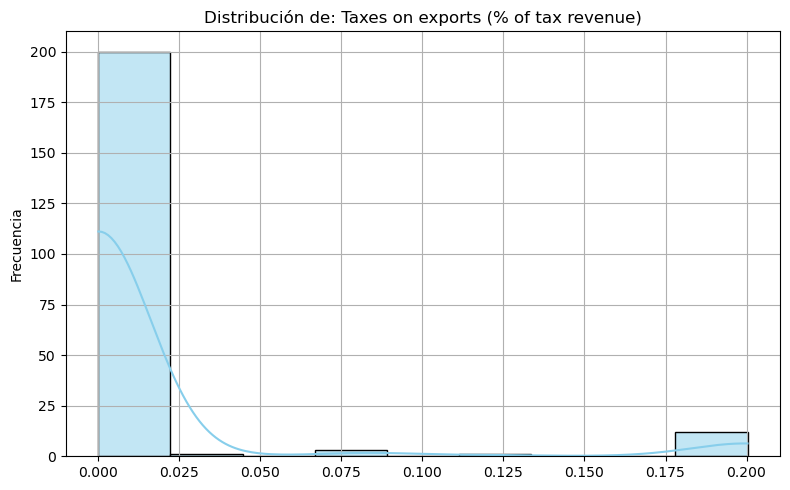

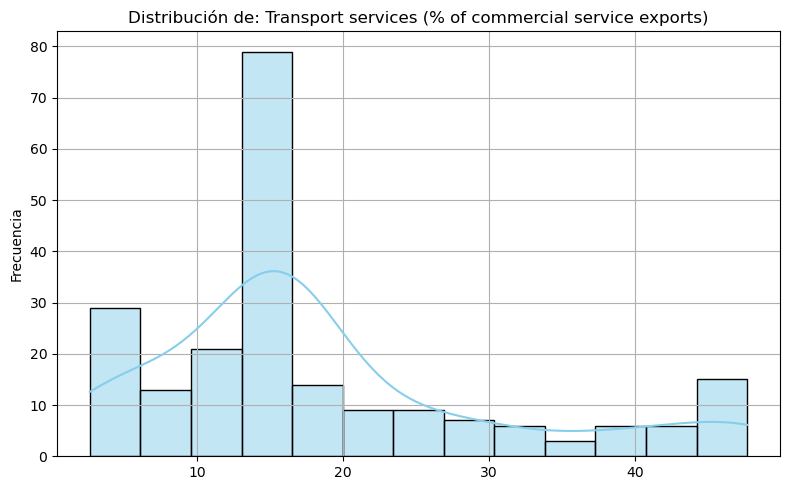

In [17]:
def winsorize_column(column):
    p5 = column.quantile(0.05)
    p95 = column.quantile(0.95)
    return column.clip(lower=p5, upper=p95)

for col in df.columns:
    if col != "Country Name":
        plt.figure(figsize=(6, 4))
        df.boxplot(column=col)
        plt.title(f"Boxplot de: {col}")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

paises = df["Country Name"]
datos_numericos = df.drop(columns=["Country Name"])
datos_winsorizados = datos_numericos.apply(winsorize_column, axis=0)
df_ = pd.concat([paises, datos_winsorizados], axis=1)
df = df_

for col in df.columns:
    if col != "Country Name":
        df[col] = pd.to_numeric(df[col], errors="coerce")
        grafico(col)




---


Se utilizó el tratamiento de winsorización utilizando los percentiles 5 y 95, considerando el posterior análisis K-means que se utilizará. Esto debido a que K-Means es un algoritmo que calcula los centroides como la media de los puntos en cada cluster, lo que lo hace muy sensible a la presencia de valores extremos o outliers. 

La winsorización, al reemplazar los valores por debajo del percentil 5 y por encima del percentil 95 por estos mismos límites, ayuda a preservar la mayor parte de la distribución original (alrededor del 90%), manteniendo todos los registros o países en el análisis. Esto evita la eliminación de observaciones y previene la pérdida de información crítica que podría distorsionar los resultados finales.

Además, realizar la winsorización antes de aplicar la estandarización es fundamental, ya que esta práctica previene que los outliers dominen el cálculo de la media y la desviación estándar, permitiendo que la estandarización refleje con mayor fidelidad la distribución central de los datos. En casos de distribuciones sesgadas, la winsorización contribuye a reducir la asimetría sin necesidad de recurrir a transformaciones complejas, lo que además mejora la interpretabilidad del proceso.


---


## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



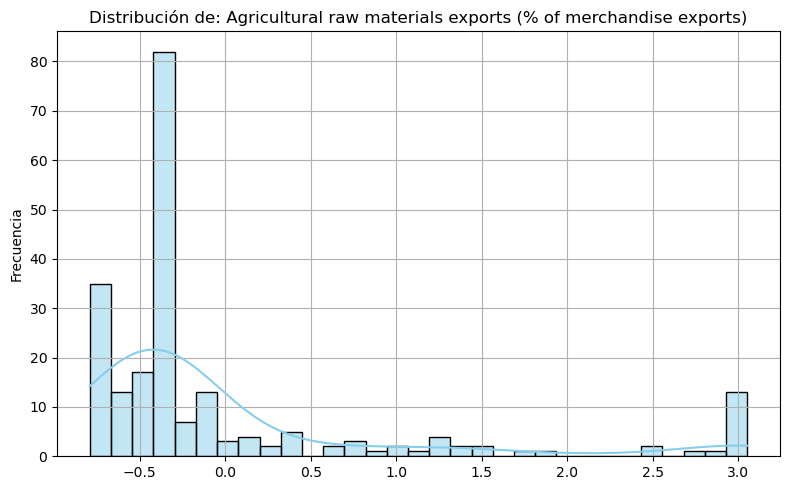

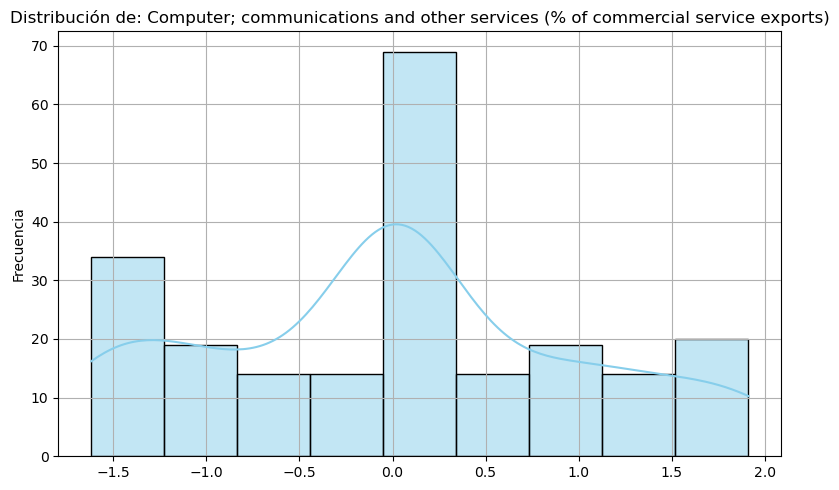

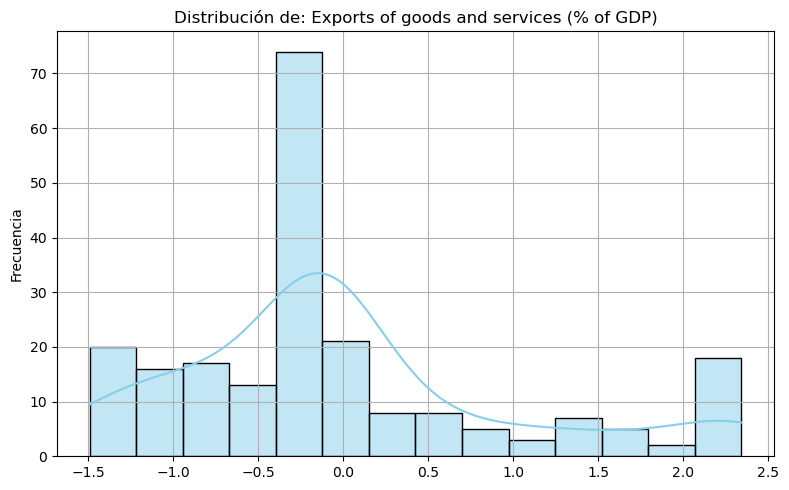

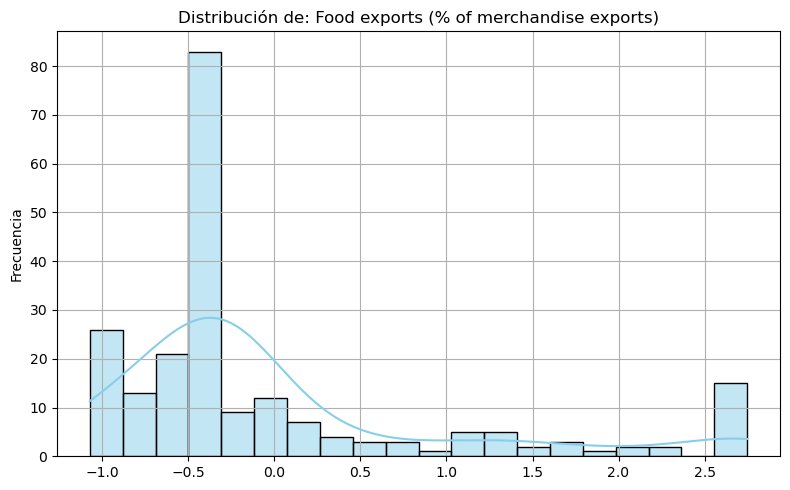

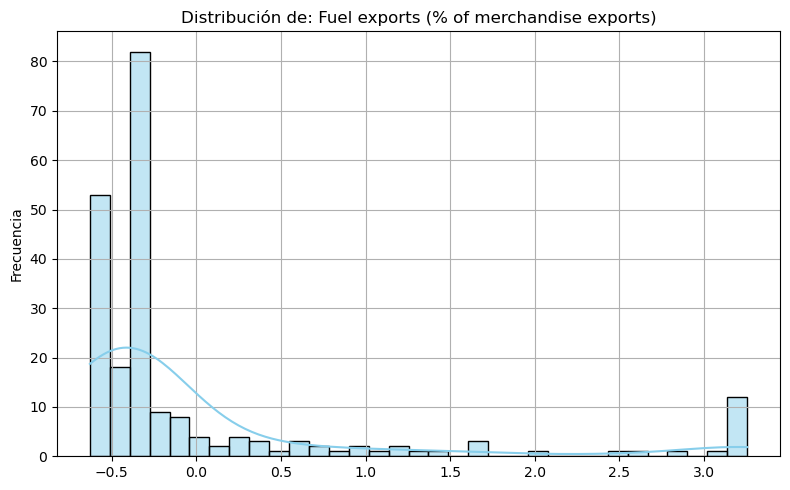

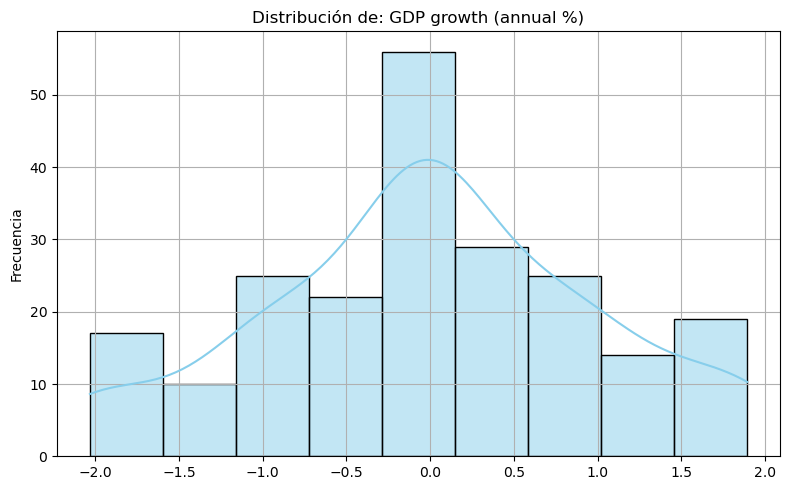

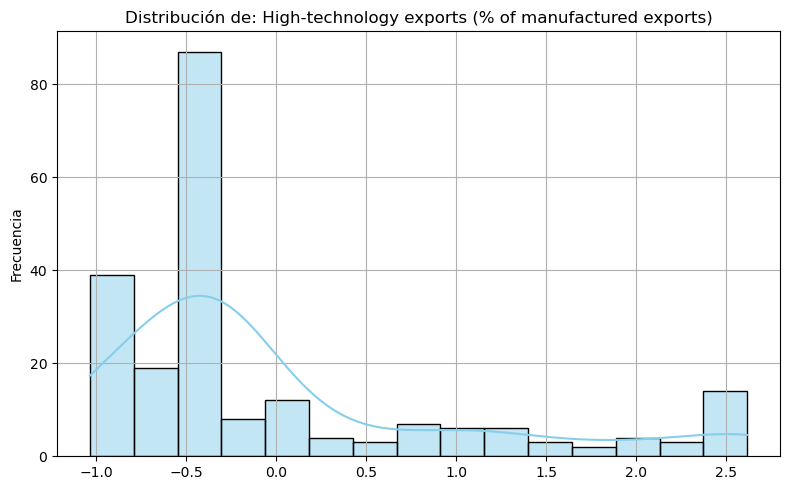

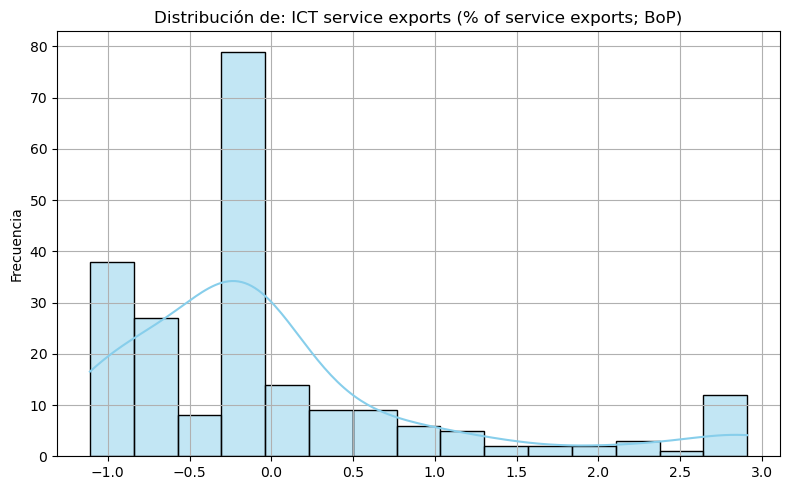

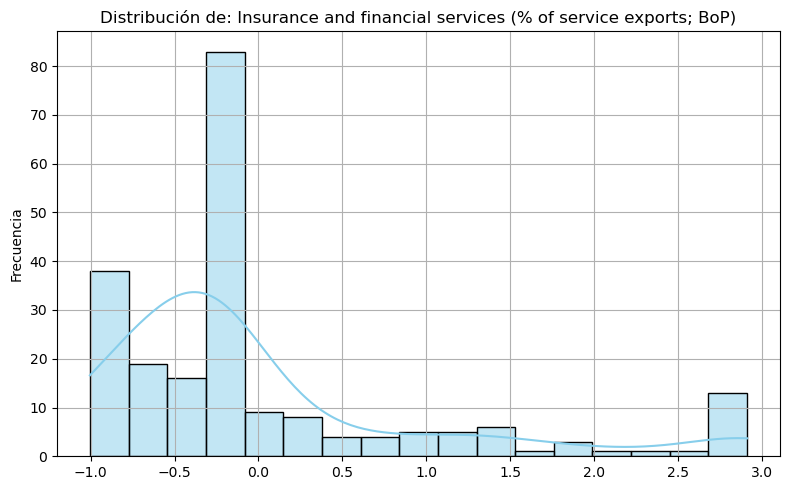

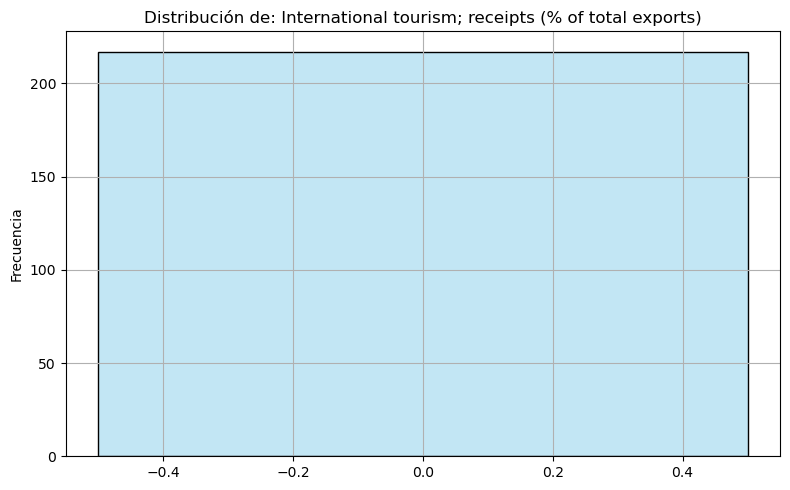

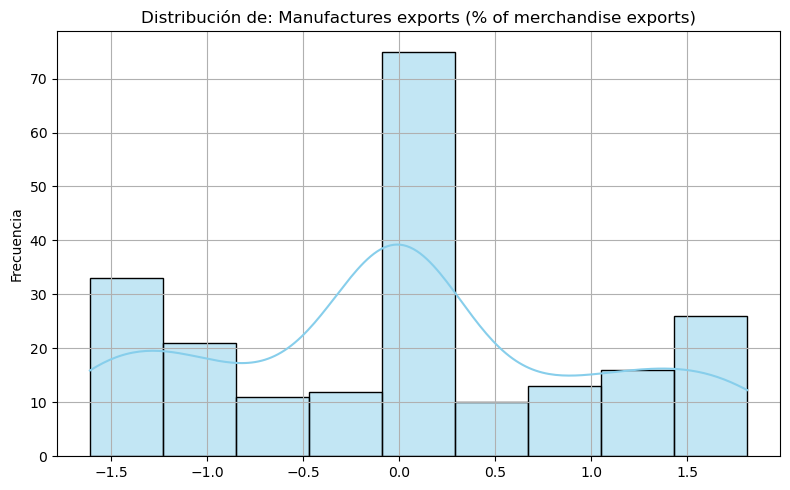

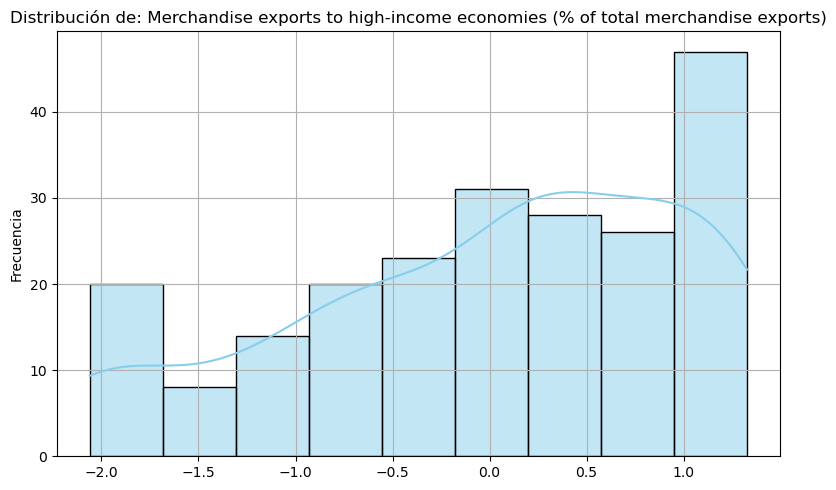

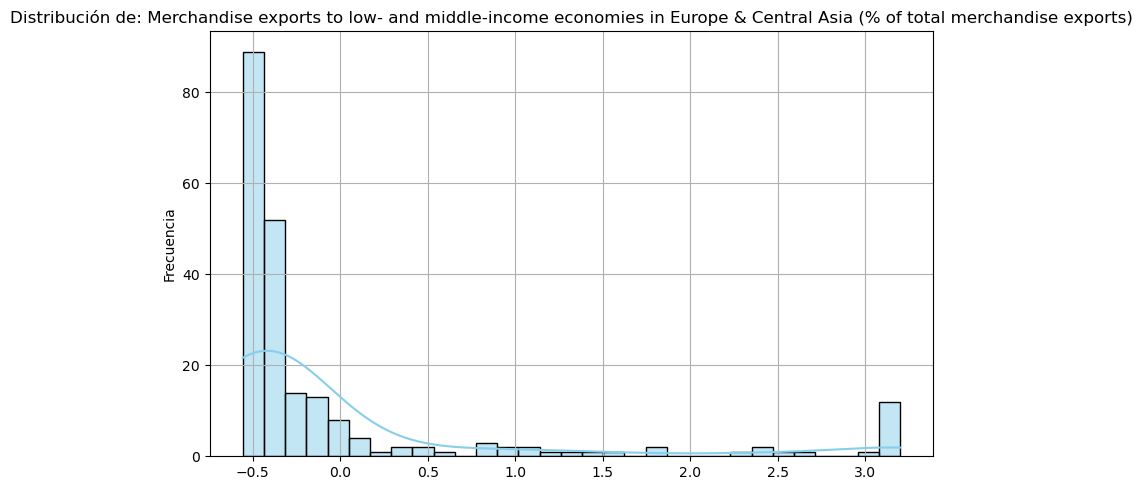

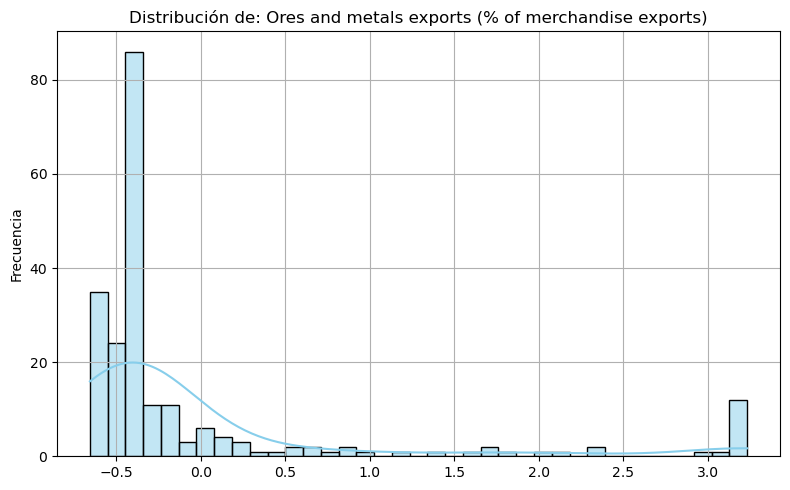

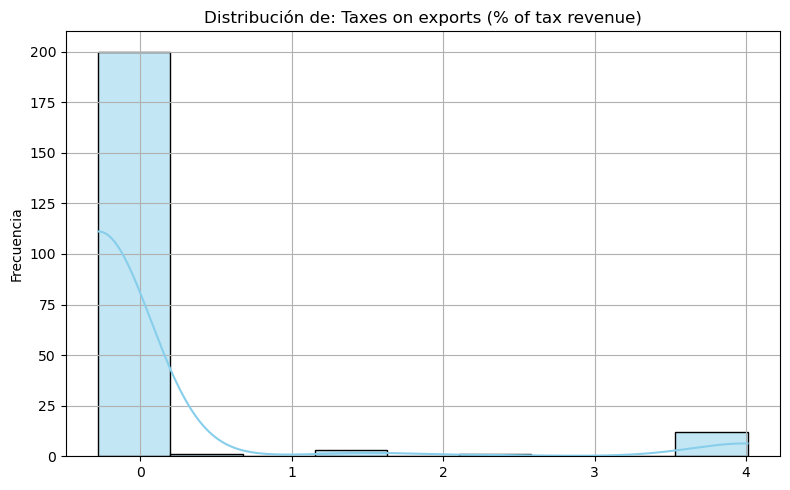

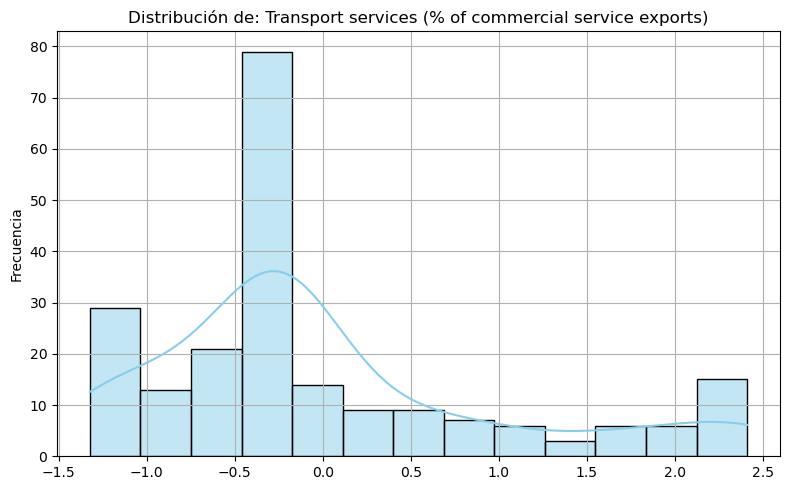

In [20]:
from sklearn.preprocessing import StandardScaler

paises = df["Country Name"]
datos_numericos = df.drop(columns=["Country Name"])
datos_numericos = datos_numericos.apply(pd.to_numeric, errors="coerce")
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos_numericos)
df = pd.DataFrame(datos_escalados, columns=datos_numericos.columns)
df["Country Name"] = paises.values

for col in df.columns:
    if col != "Country Name":
        grafico(col)

## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.



C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'Elbow curve')

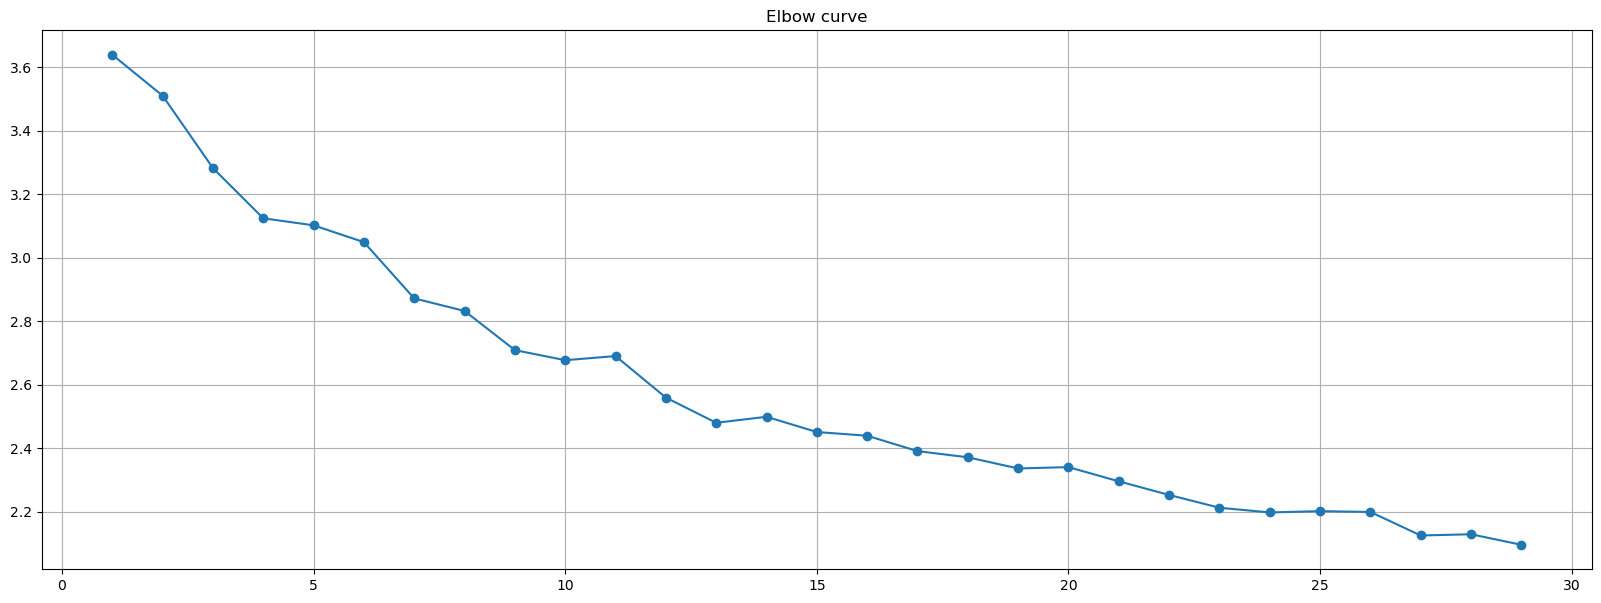

In [22]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

datos_numericos = df.drop(columns=["Country Name"])

dispersion = []
for k in range(1, 30):
  model = KMeans(n_clusters=k)
  model.fit(datos_numericos)
  dist_ecl = cdist(datos_numericos, model.cluster_centers_, 'euclidean')
  min_dist = np.min(dist_ecl, axis=1)
  average_dis = sum(min_dist)/len(datos_numericos)
  dispersion.append(average_dis)

fig = plt.figure(figsize=(20, 7))
plt.plot(range(1, 30), dispersion, marker = "o")
plt.grid(True)
plt.title('Elbow curve')




---


En el gráfico, se observa una disminución pronunciada de la inercia al aumentar el número de clusters desde valores bajos, lo que indica que la mejora en la compactación de los clusters es significativa al principio. Sin embargo, a partir del k=2, la pendiente de la curva se quiebra, no tan notablemente, y la reducción en la inercia es mucho menos pronunciada. Este punto de inflexión o “codo” sugiere que agregar más clusters más allá de este número no aporta una mejora considerable en la agrupación. 

Por otro lado, la dinámica de la "Elbow Curve" está un poco suavizada por la cantidad amplia de clusters, por lo que es dificil distinguir algún codo óptimo, de igual forma, el k = 2 es el codo que se eligiría dado su notable quiebre inicial.


---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


In [26]:
datos_numericos.corr()

Agricultural raw materials exports (% of merchandise exports)  \
Agricultural raw materials exports (% of mercha...                                           1.000000               
Computer; communications and other services (% ...                                           0.121545               
Exports of goods and services (% of GDP)                                                    -0.156296               
Food exports (% of merchandise exports)                                                      0.170907               
Fuel exports (% of merchandise exports)                                                     -0.065296               
GDP growth (annual %)                                                                        0.023642               
High-technology exports (% of manufactured expo...                                          -0.071703               
ICT service exports (% of service exports; BoP)                                              0.096762               
Insurance and financial services (% of service ...                                          -0.044631               
International tourism; receipts (% of total exp...                                                NaN               
Manufactures exports (% of merchandise exports)                                             -0.123797               
Merchandise exports to high-income economies (%...                                          -0.072715               
Merchandise exports to low- and middle-income e...                                           0.075237               
Ores and metals exports (% of merchandise exports)                                           0.026842               
Taxes on exports (% of tax revenue)                                                          0.129439               
Transport services (% of commercial service exp...                                           0.092762               

                                                    Computer; communications and other services (% of commercial service exports)  \
Agricultural raw materials exports (% of mercha...                                           0.121545                               
Computer; communications and other services (% ...                                           1.000000                               
Exports of goods and services (% of GDP)                                                     0.088984                               
Food exports (% of merchandise exports)                                                     -0.152682                               
Fuel exports (% of merchandise exports)                                                     -0.110236                               
GDP growth (annual %)                                                                       -0.227772                               
High-technology exports (% of manufactured expo...                                           0.359113                               
ICT service exports (% of service exports; BoP)                                              0.618391                               
Insurance and financial services (% of service ...                                           0.073092                               
International tourism; receipts (% of total exp...                                                NaN                               
Manufactures exports (% of merchandise exports)                                              0.336784                               
Merchandise exports to high-income economies (%...                                           0.189384                               
Merchandise exports to low- and middle-income e...                                          -0.008134                               
Ores and metals exports (% of merchandise exports)                                          -0.210386                               
Taxes on exports (% of tax revenue)                                

In [28]:
datos_numericos.describe()

Agricultural raw materials exports (% of merchandise exports)  \
count                                       2.170000e+02               
mean                                        2.660442e-16               
std                                         1.002312e+00               
min                                        -7.915956e-01               
25%                                        -4.854133e-01               
50%                                        -3.606498e-01               
75%                                        -1.096696e-01               
max                                         3.050946e+00               

       Computer; communications and other services (% of commercial service exports)  \
count                                       2.170000e+02                               
mean                                       -1.882775e-16                               
std                                         1.002312e+00                               
min                                        -1.618360e+00                               
25%                                        -7.997431e-01                               
50%                                         2.300227e-02                               
75%                                         7.133214e-01                               
max                                         1.911897e+00                               

       Exports of goods and services (% of GDP)  \
count                              2.170000e+02   
mean                               2.537653e-16   
std                                1.002312e+00   
min                               -1.492060e+00   
25%                               -6.381454e-01   
50%                               -1.365022e-01   
75%                                2.137983e-01   
max                                2.342190e+00   

       Food exports (% of merchandise exports)  \
count                             2.170000e+02   
mean                              2.865092e-17   
std                               1.002312e+00   
min                              -1.072570e+00   
25%                              -5.470455e-01   
50%                              -3.105710e-01   
75%                               4.932194e-02   
max                               2.747399e+00   

       Fuel exports (% of merchandise exports)  GDP growth (annual %)  \
count                             2.170000e+02           2.170000e+02   
mean                              1.002782e-16           4.706936e-17   
std                               1.002312e+00           1.002312e+00   
min                              -6.289701e-01          -2.032978e+00   
25%                              -5.064147e-01          -6.831086e-01   
50%                              -3.666782e-01          -8.083651e-03   
75%                              -1.501456e-01           7.134369e-01   
max                               3.255242e+00           1.893904e+00   

       High-technology exports (% of manufactured exports)  \
count                                       2.170000e+02     
mean                                        1.309756e-16     
std                                         1.002312e+00     
min                                        -1.036463e+00     
25%                                        -6.185078e-01     
50%                                        -3.348886e-01     
75%                                         1.516446e-01     
max                                         2.618201e+00     

       ICT service exports (% of service exports; BoP)  \
count                                     2.170000e+02   
mean                                      1.350686e-16   
std                                       1.002312e+00   
min                                      -1.109559e+00   
25%                                      -6.669911e-01   
50%                                      -1.969945e-01   
75%                            

---


Dado que el análisis se enfoca en evaluar cómo se verán afectados los países por la disputa arancelaria de Estados Unidos, y considerando además los estadísticos de correlación (donde una menor correlación entre variables es preferible para evitar redundancias) se decidió utilizar factores tales como:

- Grupo 1: "Merchandise exports to high-income economies (% of total merchandise exports)", "Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)", "Insurance and financial services (% of service exports; BoP)" y "Exports of goods and services (% of GDP)"
  
- Grupo 2: "ICT service exports (% of service exports; BoP)" y "Computer; communications and other services (% of commercial service exports)"
  
- Grupo 3: "GDP growth (annual %)" y "Taxes on exports (% of tax revenue)"
  
- Grupo 4: "Ores and metals exports (% of merchandise exports)", "Agricultural raw materials exports (% of merchandise exports)" y "Transport services (% of commercial service exports)"
  
- Grupo 5: "Merchandise exports to high-income economies (% of total merchandise exports)", "Insurance and financial services (% of service exports; BoP)", "GDP growth (annual %)" y "Taxes on exports (% of tax revenue)"

---

C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

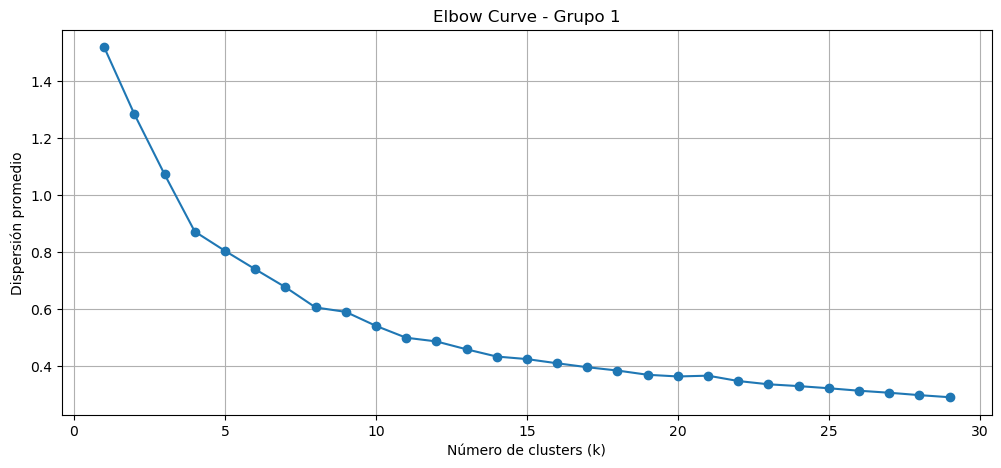

C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

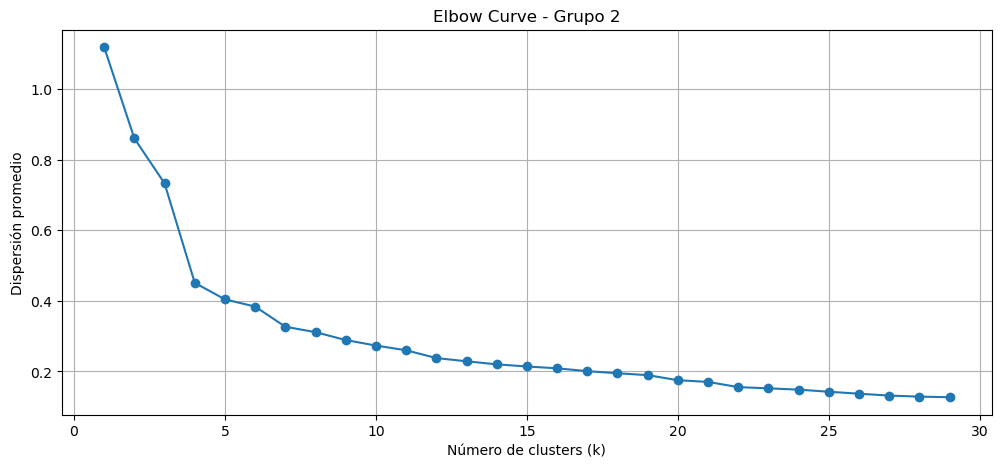

C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

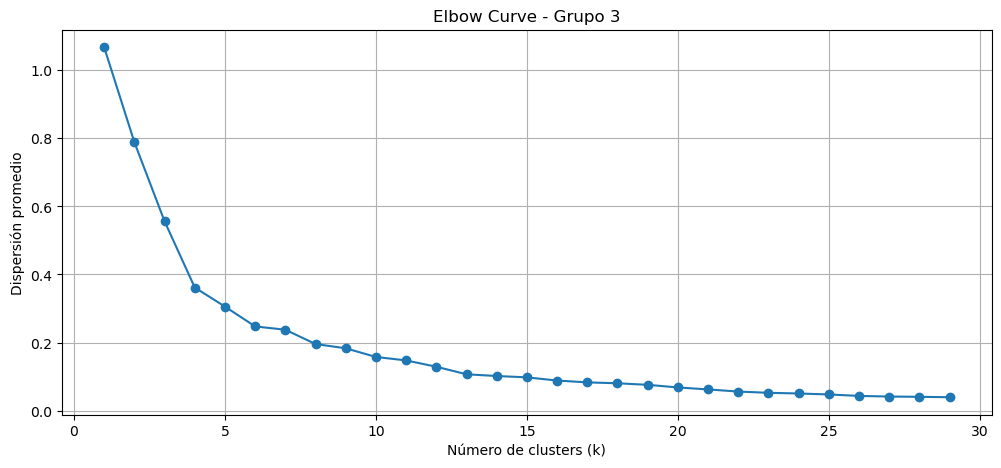

C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

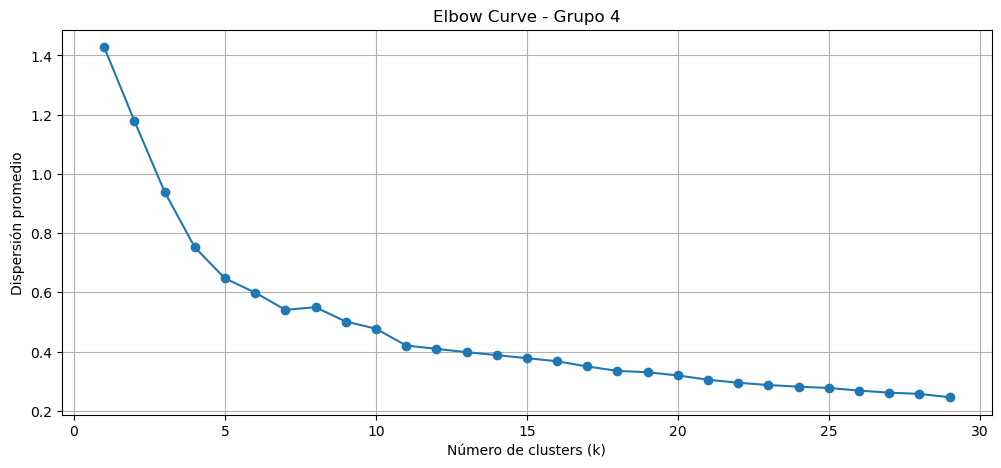

C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

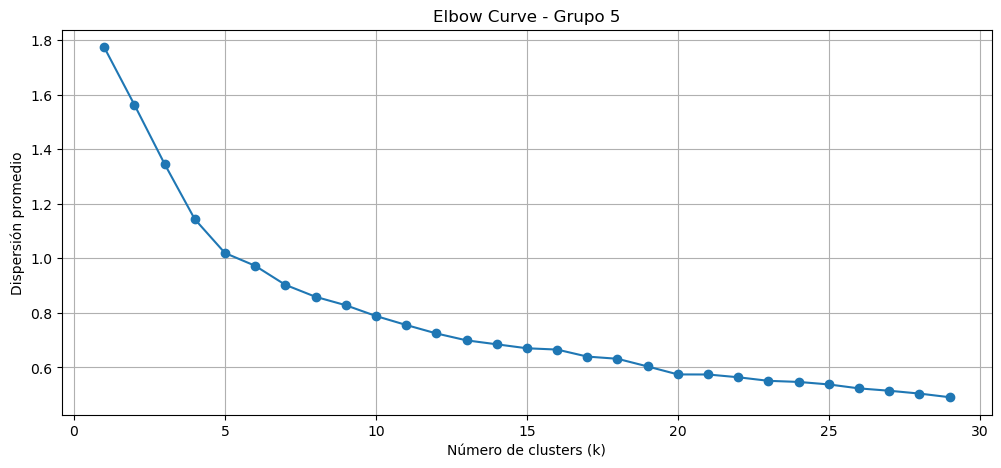

In [31]:
grupos = {"Grupo 1": ["Merchandise exports to high-income economies (% of total merchandise exports)", "Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)", "Exports of goods and services (% of GDP)"],
    "Grupo 2": ["ICT service exports (% of service exports; BoP)", "Computer; communications and other services (% of commercial service exports)"],
    "Grupo 3": ["GDP growth (annual %)","Taxes on exports (% of tax revenue)"],
    "Grupo 4": ["Ores and metals exports (% of merchandise exports)", "Agricultural raw materials exports (% of merchandise exports)", "Transport services (% of commercial service exports)"],
    "Grupo 5": ["Merchandise exports to high-income economies (% of total merchandise exports)", "Insurance and financial services (% of service exports; BoP)", "GDP growth (annual %)", "Taxes on exports (% of tax revenue)"]}

for nombre, columnas in grupos.items():
    datos_numericos = df[columnas]
    
    dispersion = []
    for k in range(1, 30):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(datos_numericos)
        dist_ecl = cdist(datos_numericos, model.cluster_centers_, 'euclidean')
        min_dist = np.min(dist_ecl, axis=1)
        average_dis = np.mean(min_dist)
        dispersion.append(average_dis)

    plt.figure(figsize=(12, 5))
    plt.plot(range(1, 30), dispersion, marker='o')
    plt.title(f'Elbow Curve - {nombre}')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Dispersión promedio')
    plt.grid(True)
    plt.show()

---


- Grupo 1 -> Clusters óptimos (según método del codo): 4
- Grupo 2 -> Clusters óptimos (según método del codo): 4
- Grupo 3 -> Clusters óptimos (según método del codo): 4
- Grupo 4 -> Clusters óptimos (según método del codo): 5
- Grupo 5 -> Clusters óptimos (según método del codo): 5


---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


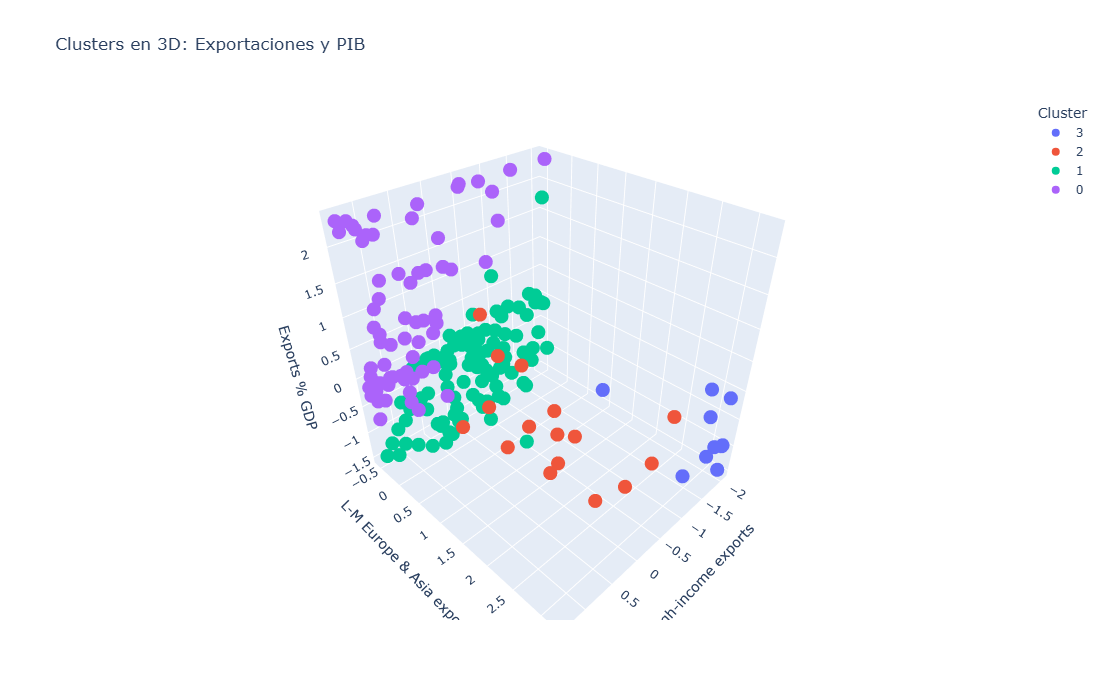


Países en cluster 0:
['Antigua and Barbuda' 'Armenia' 'Aruba' 'Austria' 'Bahrain' 'Belarus'
 'Belgium' 'Belize' 'Bermuda' 'Brunei Darussalam' 'Cabo Verde' 'Cambodia'
 'Canada' 'Chad' 'Curacao' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Estonia' 'Faroe Islands' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Germany' 'Greenland' 'Guyana' 'Hong Kong' 'Hungary' 'Iceland' 'Ireland'
 'Italy' 'Jamaica' 'Latvia' 'Libya' 'Luxembourg' 'Macao' 'Malaysia'
 'Maldives' 'Malta' 'Mauritius' 'Mexico' 'Morocco' 'Netherlands'
 'Nicaragua' 'Norway' 'Poland' 'Portugal' 'Puerto Rico' 'Samoa'
 'San Marino' 'Sao Tome and Principe' 'Seychelles' 'Singapore'
 'Sint Maarten (Dutch part)' 'Slovak Republic' 'Slovenia' 'Spain'
 'St. Kitts and Nevis' 'St. Lucia' 'Suriname' 'Sweden' 'Switzerland'
 'Thailand' 'Tonga' 'Tunisia' 'Tuvalu' 'United Arab Emirates' 'Viet Nam']

Países en cluster 1:
['Algeria' 'American Samoa' 'Andorra' 'Angola' 'Argentina' 'Australia'
 'Bahamas' 'Bangladesh' 'Barbados' 'Benin' 'Bhutan' 'Boli

In [35]:
import plotly.express as px

grupo_1 = df[["Country Name", "Merchandise exports to high-income economies (% of total merchandise exports)", "Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)","Exports of goods and services (% of GDP)"]].copy()

model = KMeans(n_clusters=4)
model.fit(grupo_1.iloc[:, 1:]) 

grupo_1['Cluster'] = model.labels_.astype(str)

df_plot = grupo_1.rename(columns={"Merchandise exports to high-income economies (% of total merchandise exports)": "High-income exports","Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)": "L-M Europe & Asia exports","Exports of goods and services (% of GDP)": "Exports % GDP"})
fig = px.scatter_3d(df_plot, x="High-income exports", y="L-M Europe & Asia exports", z="Exports % GDP", color="Cluster", hover_name="Country Name", title="Clusters en 3D: Exportaciones y PIB")
fig.update_layout(width=900, height=700)
fig.show()

for i in range(4):
    print(f"\nPaíses en cluster {i}:")
    print(grupo_1.loc[grupo_1['Cluster'] == str(i), 'Country Name'].values)

---


Para este ejercicio se seleccionó el Grupo 1, ya que permite agrupar a los países en función de sus características de exportación, identificando aquellos que podrían verse afectados de manera similar por los cambios arancelarios impuestos por Estados Unidos. 

La métrica de dispersión promedio, cercana a 0.9, indica una distancia moderada entre los clusters, reflejando una cohesión razonable dentro de los grupos. Según el método del codo, el número óptimo de clusters es 4, lo que facilita dividir la muestra en cuatro grupos para analizar el grado de similitud entre estos países.

Ahora bien, los grupos son:

- Cluster 0 (Argentina, Brasil, Chile, Sudáfrica, Uruguay...): Este grupo está formado por países con niveles variados, pero generalmente presentan valores más bajos en exportaciones hacia economías de altos ingresos y en la proporción de exportaciones sobre el PIB (valores negativos o cercanos a cero en las variables estandarizadas). Esto indica que estos países tienen una menor integración en los mercados de alto ingreso o una menor dependencia relativa del comercio exterior. Por lo tanto, es probable que la guerra comercial con Estados Unidos les afecte de manera indirecta o moderada, ya que su exposición directa es menor.

- Cluster 1 (México, India, Canadá, Francia, España...): Países con valores intermedios en las variables consideradas, mostrando una mayor diversificación y un nivel moderado de exportaciones hacia mercados desarrollados. Estos países pueden experimentar impactos más significativos derivados de la guerra comercial, particularmente si tienen sectores exportadores vinculados a Estados Unidos o cadenas globales afectadas.

- Cluster 2 (Albania, Rusia, Kazajistán, Serbia...): Este grupo muestra valores mixtos, con algunos países exhibiendo un perfil de participación exportadora distinto. La exposición puede ser heterogénea, aunque generalmente con menor dependencia directa a mercados de alto ingreso o sectores tradicionales de exportación. Estos países podrían verse afectados de manera indirecta o a través de canales secundarios en la economía global.

- Cluster 3 (Hong Kong, Países Bajos, Singapur, Suiza, Emiratos Árabes Unidos...): Con altos valores en exportaciones hacia economías de alto ingreso y en la proporción de exportaciones respecto al PIB, este grupo incluye países altamente integrados en la economía global. Son los más susceptibles a sufrir impactos directos y fuertes de la guerra comercial, ya que muchos dependen en gran medida del comercio con Estados Unidos y otros mercados desarrollados, así como de sectores de servicios y manufactura.

---

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



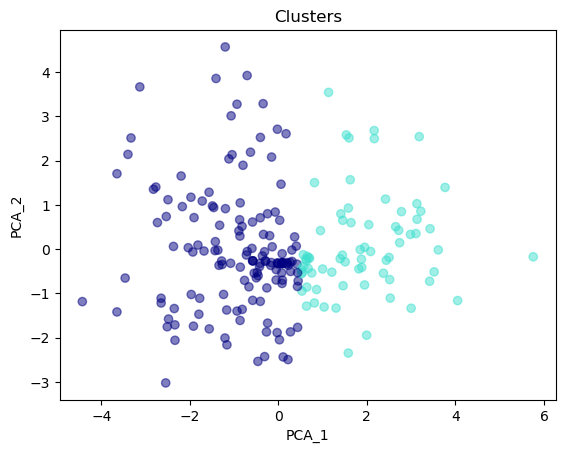

Loadings ordenados para Componente 1:
Manufactures exports (% of merchandise exports)                                                                      0.726696
Computer; communications and other services (% of commercial service exports)                                        0.673759
High-technology exports (% of manufactured exports)                                                                  0.625270
ICT service exports (% of service exports; BoP)                                                                      0.542716
Merchandise exports to high-income economies (% of total merchandise exports)                                        0.507284
Exports of goods and services (% of GDP)                                                                             0.391581
Insurance and financial services (% of service exports; BoP)                                                         0.243579
International tourism; receipts (% of total exports)                            

In [38]:
from sklearn.decomposition import PCA

datos_numericos = df.drop(columns=["Country Name"])

pca = PCA(n_components=2)
df_pca = pca.fit_transform(datos_numericos)
var_exp = pca.explained_variance_ratio_

model = KMeans(n_clusters=2)
model.fit(df_pca)

color = np.where(model.labels_ == 0, 'navy', np.where(model.labels_ ==1 ,'turquoise','darkorange'))

plt.scatter(df_pca[:,0],df_pca[:,1],alpha=0.5,color=color)
plt.title('Clusters')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=datos_numericos.columns, columns=['Componente 1', 'Componente 2'])
print("Loadings ordenados para Componente 1:")
print(loadings_df['Componente 1'].sort_values(ascending=False))
print("\n")
print("Loadings ordenados para Componente 2:")
print(loadings_df['Componente 2'].sort_values(ascending=False))

---


El componente 1 creado, está fuertemente asociado con exportaciones manufacturadas y servicios tecnológicos. Las variables con mayor carga positiva incluyen Exportaciones manufacturadas, Servicios de computación, comunicaciones y otros servicios, Exportaciones de alta tecnología, Servicios de TIC, Exportaciones a economías de altos ingresos y Exportaciones totales de bienes y servicios (% del PIB). De esta forma el PC1 separa a los países con economías orientadas hacia manufacturas y tecnologías avanzadas de aquellos con economías más dependientes de materias primas y sectores tradicionales.

En cambio el componente 2, está relacionado a variables vinculadas a exportaciones de recursos naturales y servicios de transporte. En este caso las variables son Exportaciones de combustible, Servicios de transporte, Servicios de seguros y financieros y Exportaciones de minerales y metales. Es decir, el PC2 distingue principalmente a países cuya economía depende de recursos naturales y sectores relacionados, frente a aquellos con menor peso en estos sectores. También podría reflejar diferencias en la infraestructura y servicios relacionados con el transporte y finanzas.



---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



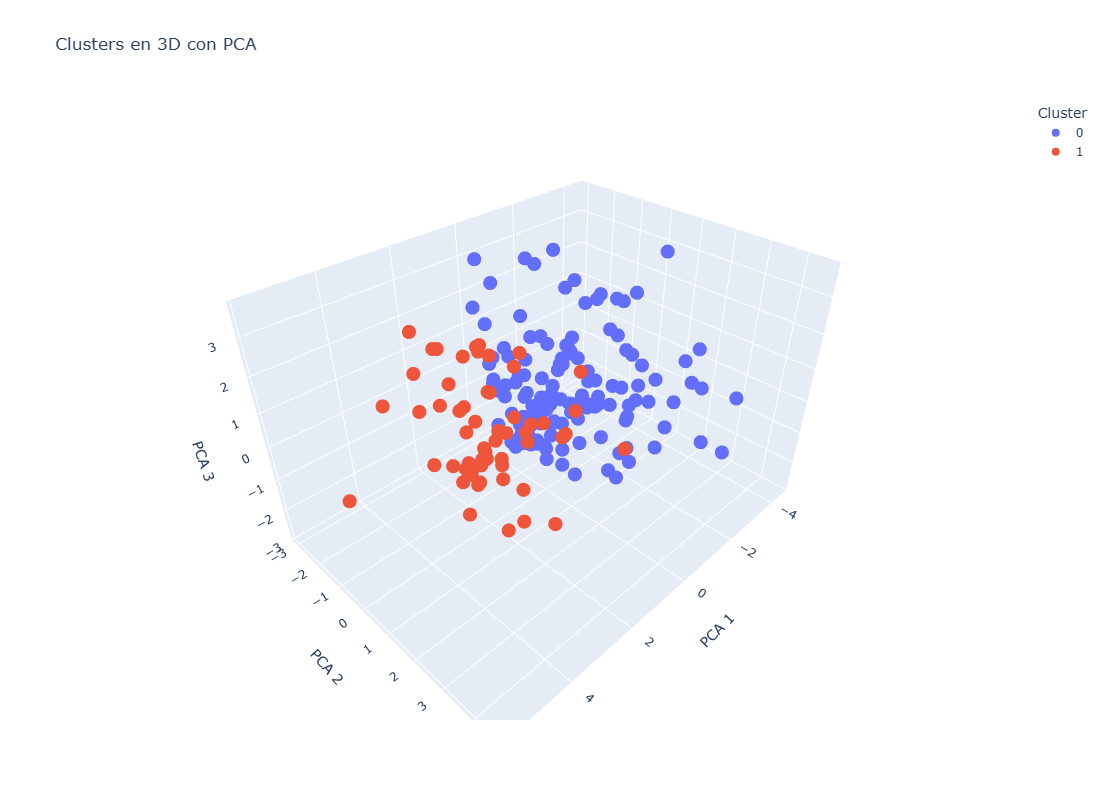

Loadings ordenados para Componente 1:
Manufactures exports (% of merchandise exports)                                                                      0.726696
Computer; communications and other services (% of commercial service exports)                                        0.673759
High-technology exports (% of manufactured exports)                                                                  0.625270
ICT service exports (% of service exports; BoP)                                                                      0.542716
Merchandise exports to high-income economies (% of total merchandise exports)                                        0.507284
Exports of goods and services (% of GDP)                                                                             0.391581
Insurance and financial services (% of service exports; BoP)                                                         0.243579
International tourism; receipts (% of total exports)                            

In [41]:
datos_numericos = df.drop(columns=["Country Name"])

pca = PCA(n_components=3)
df_pca = pca.fit_transform(datos_numericos)

model = KMeans(n_clusters=2)
model.fit(df_pca)

df_plot = pd.DataFrame(df_pca, columns=['PCA_1', 'PCA_2', 'PCA_3'])
df_plot['Cluster'] = model.labels_.astype(str) 

fig = px.scatter_3d(df_plot, x='PCA_1', y='PCA_2', z='PCA_3', color='Cluster', title='Clusters en 3D con PCA', labels={'PCA_1': 'PCA 1', 'PCA_2': 'PCA 2', 'PCA_3': 'PCA 3'}, width=1000,height=800)

fig.show()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=datos_numericos.columns, columns=['Componente 1', 'Componente 2', 'Componente 3'])
print("Loadings ordenados para Componente 1:")
print(loadings_df['Componente 1'].sort_values(ascending=False))
print("\n")
print("Loadings ordenados para Componente 2:")
print(loadings_df['Componente 2'].sort_values(ascending=False))
print("\n")
print("Loadings ordenados para Componente 3:")
print(loadings_df['Componente 3'].sort_values(ascending=False))

---


- Componente 1: Está fuertemente asociado con exportaciones manufacturadas, tecnología avanzada y servicios relacionados con comunicación e informática. Las variables relevantes son Manufacturas exportadas, Servicios de computación, comunicación y otros servicios comerciales, Exportaciones de alta tecnología, Servicios TIC y Exportaciones a economías de altos ingresos. Representan economías tecnológicamente avanzadas y orientadas a manufacturas.

- Componente 2: Está relacionado principalmente con exportaciones de combustibles, transporte y materias primas minerales. También incluye servicios financieros e industriales menos tecnológicos. Las variables relevantes son Exportaciones de combustibles, Servicios de transporte, Servicios financieros y de seguros y Exportaciones de minerales (ores and metals). Representan países dependientes de recursos naturales, energía y transporte.

- Componente 3: Agrupa exportaciones de materias primas agrícolas, servicios de TIC y exportaciones hacia economías emergentes de Europa y Asia Central. Las variables relevantes son Exportaciones de materias primas agrícolas, Servicios TIC y otros servicios relacionados, Exportaciones hacia economías emergentes de Europa y Asia Central e Impuestos sobre exportaciones. Representan a países más orientados a materias primas agrícolas y mercados emergentes.


---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [44]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}

df['Continent'] = df['Country Name'].map(country_continent_mapping)
df.head()

Agricultural raw materials exports (% of merchandise exports)  \
0                                          -0.360650               
1                                          -0.581497               
2                                          -0.360650               
3                                          -0.360650               
4                                          -0.576188               

   Computer; communications and other services (% of commercial service exports)  \
0                                           0.023002                               
1                                          -0.538560                               
2                                           1.305804                               
3                                           0.023002                               
4                                          -1.151829                               

   Exports of goods and services (% of GDP)  \
0                                 -1.236858   
1                                 -0.142764   
2                                 -0.894764   
3                                 -0.136502   
4                                 -0.136502   

   Food exports (% of merchandise exports)  \
0                                -0.310571   
1                                -0.486148   
2                                -0.310571   
3                                -0.310571   
4                                -1.072570   

   Fuel exports (% of merchandise exports)  GDP growth (annual %)  \
0                                -0.366678              -0.112443   
1                                -0.222652               0.400674   
2                                -0.366678               0.469065   
3                                -0.366678              -0.008084   
4                                -0.628622              -0.165747   

   High-technology exports (% of manufactured exports)  \
0                                          -0.334889     
1                                          -1.008455     
2                                          -0.334889     
3                                          -0.334889     
4                                           1.604947     

   ICT service exports (% of service exports; BoP)  \
0                                        -0.196995   
1                                        -0.784836   
2                                        -0.895063   
3                                        -0.196995   
4                                        -0.601101   

   Insurance and financial services (% of service exports; BoP)  \
0                                          -0.296756              
1                                          -0.925994              
2                                           1.456516              
3                                          -0.296756              
4                                          -0.166771              

   International tourism; receipts (% of total exports)  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   Manufactures exports (% of merchandise exports)  \
0                                         0.004868   
1                                         0.619994   
2                                         0.004868   
3                                         0.004868   
4                                         1.811077   

   Merchandise exports to high-income economies (% of total merchandise exports)  \
0                                          -2.059433                               
1                                           0.700106                               
2                                           0.805888                               
3                    

### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


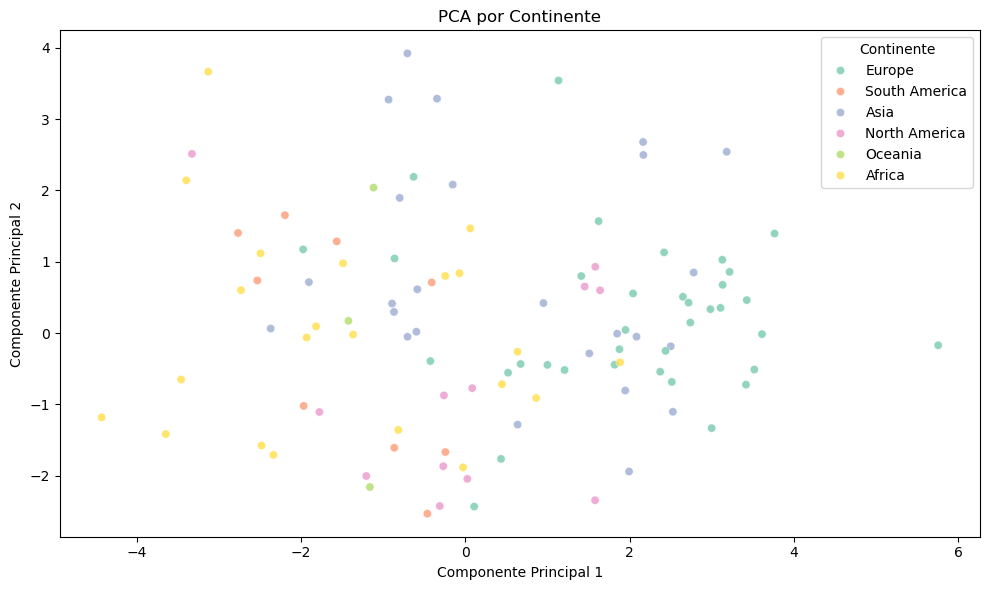

In [46]:
datos_numericos = df.drop(columns=["Country Name", "Continent"])  # Asegúrate de excluir también 'Continent'
pca = PCA(n_components=2)
df_pca = pca.fit_transform(datos_numericos)
var_exp = pca.explained_variance_ratio_

df_plot = pd.DataFrame({'PCA_1': df_pca[:, 0], 'PCA_2': df_pca[:, 1], 'Continent': df['Continent']})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PCA_1', y='PCA_2', hue='Continent', palette='Set2', alpha=0.7)
plt.title('PCA por Continente')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Continente')
plt.tight_layout()
plt.show()

---


Se observa que los países de Europa tienden a concentrarse en la parte derecha del gráfico, lo que indica que sus países comparten características similares según los componentes principales derivados de las exportaciones y servicios analizados. En contraste, muchos países africanos se ubican hacia el extremo izquierdo, lo que sugiere una estructura exportadora distinta a la europea, basada posiblemente en materias primas y productos menos manufacturados. De esta forma, podemos asumir que los valores altos en PCA_1 están asociados a economías más industrializadas y orientadas a servicios avanzados

Por otro lado, el PCA_2 está relacionado con exportaciones de combustibles, transporte e ingresos por servicios financieros, lo cual puede explicar la mayor dispersión vertical de Asia y América Latina. Es decir, dentro de esos continentes hay países exportadores de combustibles (como Arabia Saudita o Venezuela) y otros que no lo son, generando dispersión.

De igual forma, no se observa una concentración regional específica más de los hallazgos nombrados.



---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



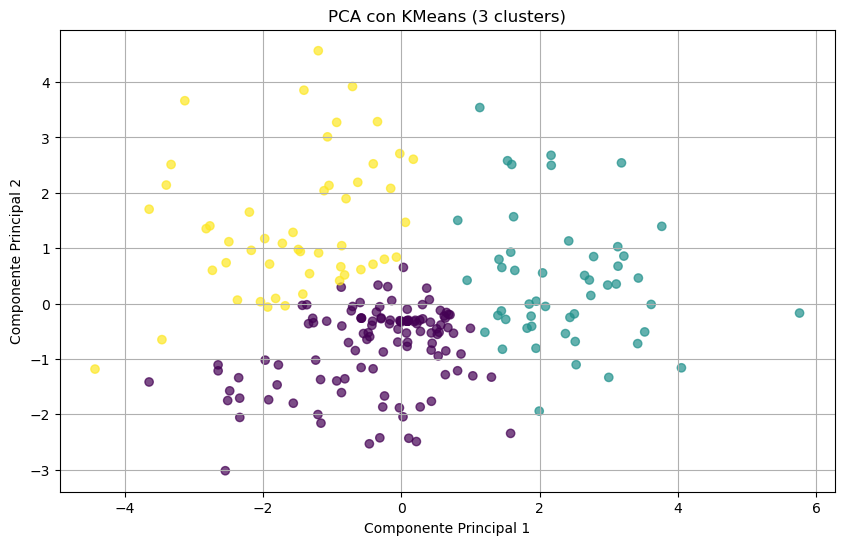

In [49]:
datos_numericos = df.drop(columns=["Country Name", "Continent"])
pca = PCA(n_components=2)
df_pca = pca.fit_transform(datos_numericos)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('PCA con KMeans (3 clusters)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

---


- El cluster amarillo (superior izquierdo): Este grupo reúne países con baja intensidad tecnológica en sus exportaciones, pero con alta participación de bienes basados en recursos naturales, como petróleo, minerales o servicios de transporte. Su estructura exportadora depende fuertemente de commodities, por lo que es esperable encontrar en este clúster economías de África, Medio Oriente y algunos países latinoamericanos con alta concentración en materias primas.

- El cluster morado (abajo): Agrupa países con baja participación tanto en exportaciones tecnológicas como en recursos naturales. Estas economías presentan estructuras exportadoras más tradicionales, poco diversificadas y con menor integración al comercio internacional. Es esperable que incluyan países de ingreso medio-bajo o en vías de desarrollo.

- Color celeste (derecha): Este clúster agrupa países con alto contenido tecnológico y de servicios modernos en sus exportaciones, ubicados principalmente en la zona derecha del gráfico. Aunque algunos también exportan recursos naturales, su rasgo distintivo es la orientación hacia productos de alto valor agregado. Incluye principalmente economías avanzadas o emergentes industrializadas como Alemania, Corea del Sur, Estados Unidos y varios países europeos.


---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


In [52]:
df['Cluster_KMeans'] = clusters
tabla = df.groupby(['Continent', 'Cluster_KMeans']).size().unstack(fill_value=0)
proporciones = tabla.div(tabla.sum(axis=1), axis=0)
proporciones

Cluster_KMeans         0         1         2
Continent                                   
Africa          0.409091  0.045455  0.545455
Asia            0.160000  0.480000  0.360000
Europe          0.166667  0.750000  0.083333
North America   0.666667  0.250000  0.083333
Oceania         0.333333  0.000000  0.666667
South America   0.444444  0.000000  0.555556

### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


In [54]:
datos_numericos = df.drop(columns=["Country Name", "Continent", "Cluster_KMeans"])
kmeans_real = KMeans(n_clusters=3, random_state=42)
kmeans_real.fit(datos_numericos)
centroides = pd.DataFrame(kmeans_real.cluster_centers_, columns=datos_numericos.columns)
centroides.index.name = 'Cluster'
centroides

C:\Users\crist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Agricultural raw materials exports (% of merchandise exports)  \
Cluster                                                                  
0                                                 0.218454               
1                                                -0.077251               
2                                                -0.098435               

         Computer; communications and other services (% of commercial service exports)  \
Cluster                                                                                  
0                                                -0.217290                               
1                                                -0.568107                               
2                                                 0.298067                               

         Exports of goods and services (% of GDP)  \
Cluster                                             
0                                       -0.356377   
1                                        0.024069   
2                                        0.192224   

         Food exports (% of merchandise exports)  \
Cluster                                            
0                                       0.931101   
1                                      -0.415911   
2                                      -0.392662   

         Fuel exports (% of merchandise exports)  GDP growth (annual %)  \
Cluster                                                                   
0                                      -0.302697               0.514149   
1                                       1.519895               0.012582   
2                                      -0.302077              -0.292005   

         High-technology exports (% of manufactured exports)  \
Cluster                                                        
0                                                -0.531134     
1                                                -0.040129     
2                                                 0.310072     

         ICT service exports (% of service exports; BoP)  \
Cluster                                                    
0                                              -0.089216   
1                                              -0.156224   
2                                               0.098475   

         Insurance and financial services (% of service exports; BoP)  \
Cluster                                                                 
0                                                -0.194412              
1                                                 0.334422              
2                                                 0.005152              

         International tourism; receipts (% of total exports)  \
Cluster                                                         
0                                                      0.0      
1                                                      0.0      
2                                                      0.0      

         Manufactures exports (% of merchandise exports)  \
Cluster                                                    
0                                              -0.449190   
1                                              -1.134320   
2                                               0.603732   

         Merchandise exports to high-income economies (% of total merchandise exports)  \
Cluster                                                                                  
0                                                -0.860026                               
1                                                -0.183505                               
2                                                 0.538861                               

         Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)  \
Cluster                                                                                     

---


- Característica más alta en magnitud y su signo:
  - Centroide 0: Food exports (% of merchandise exports), signo positivo.
  - Centroide 1: Fuel exports (% of merchandise exports), signo positivo.
  - Centroide 2: Manufactures exports (% of merchandise exports), signo positivo.


- Interpretación de clusters:
  El cluster 0 está fuertemente caracterizado por una alta proporción de exportaciones de alimentos, lo que sugiere una especialización en productos agrícolas o agroindustriales. Por otro lado, el cluster 1 destaca por su alta participación de exportaciones de combustibles, indicando economías intensivas en recursos naturales energéticos (como petróleo y gas). Finalmente, el cluster 2 se distingue por una fuerte orientación hacia exportaciones manufactureras, lo que refleja algo más relacionado con industrialización.


- Conclusión:
  - En cuanto al cluster 0, los alimentos al ser bienes de primera necesidad, tienen una demanda relativamente inelástica frente a aranceles. Aunque estos pueden encarecerlos y motivar sustituciones o proteccionismo, la demanda tiende a mantenerse estable, lo que modera el impacto en comparación con otros sectores. Se verá menos afectado.
  - Por el lado del cluster 1, los combustibles aunque siguen teniendo alta demanda global, son sensibles a la volatilidad de precios y a cambios en políticas energéticas. En una guerra comercial, podrían enfrentar menor demanda por aranceles o autosuficiencia energética, lo que genera incertidumbre y desafíos para los exportadores. Se verá afectado de manera intermedia.
  - Finalmente, considerando el cluster 2, las manufacturas son altamente vulnerables a las guerras comerciales debido a su sensibilidad a los aranceles y a la complejidad de sus cadenas de suministro. Las interrupciones generan efectos en cascada y los ajustes son difíciles en el corto plazo, lo que expone fuertemente a este sector. Se verá más afectado.


---